In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import norm, skew 

from sklearn.model_selection import train_test_split # 4.1
from sklearn.linear_model import LogisticRegression  # 4.2
from sklearn.ensemble import RandomForestClassifier  # 4.3
from sklearn.naive_bayes import GaussianNB           # 4.4
from sklearn.neighbors import KNeighborsClassifier   # 4.5
from sklearn.svm import SVC                          # 4.6
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
    
%config InlineBackend.figure_format = 'retina'

# Model Accuracies
ml_accuracies = dict()

C:\Users\himan\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
colors = ['lightcoral',
          'brown',
          'lightseagreen',
          'maroon',
          'deeppink',
          'darkorange',
          'royalblue',
          'darkviolet',
          'gold',
          'crimson',
          'lightsteelblue',
          'salmon',
          'mediumseagreen',
          'olivedrab',
          'blue',
          'limegreen',
          'slateblue',
          'red',
          'steelblue',
          'teal',
          'peru',
          'dimgray',
          'violet',
          'cyan']

In [3]:
df = pd.read_csv("lung.csv", index_col='index')

# Index Column now refers to patient
df.drop("Patient Id", axis=1, inplace=True)

# cleaning column names
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)

display(df)

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   
...    ...     ...            ...          ...           ...   
995     44       1              6            7             7   
996     37       2              6            8             7   
997     25       2              4            5             6   
998     18       2              6            8             7   
999     47       1              6            5             6   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   
...                     ...           ...                   ...   
995                       7             7                     6   
996                       7             7                     6   
997                       5             5                     4   
998                       7             7                     6   
999                       5             5                     4   

       balanced_diet  obesity  ...  fatigue  weight_loss  shortness_of_breath  \
index                          ...                                              
0                  2        4  ...        3            4                    2   
1                  2        2  ...        1            3                    7   
2                  6        7  ...        8            7                    9   
3                  7        7  ...        4            2                    3   
4                  7        7  ...        3            2                    4   
...              ...      ...  ...      ...          ...                  ...   
995                7        7  ...        5            3                    2   
996                7        7  ...        9            6                    5   
997                6        7  ...        8            7                    9   
998                7        7  ...        3            2                    4   
999                6        7  ...        8            7                    9   

       wheezing  swallowing_difficulty  clubbing_of_finger_nails  \
index                                                              
0             2                      3                         1   
1             8                      6                         2   
2             2                      1                         4   
3             1                      4                         5   
4             1                      4                         2   
...         ...                    ...                       ...   
995           7                      8                         2   
996           7                      2                         4   
997           2                      1                         4   
998           1                      4                         2   
999           2                      1                         4   

       frequent_cold  dry_cough  snoring   level  
index                                             
0                  2          3        4     Low  
1                  1          7        2  Medium  
2                  6          7        2    High  
3                  6          7        5    High  
4                  4          2        3    High  
...   

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   age                       1000 non-null   int64 
 1   gender                    1000 non-null   int64 
 2   air_pollution             1000 non-null   int64 
 3   alcohol_use               1000 non-null   int64 
 4   dust_allergy              1000 non-null   int64 
 5   occupational_hazards      1000 non-null   int64 
 6   genetic_risk              1000 non-null   int64 
 7   chronic_lung_disease      1000 non-null   int64 
 8   balanced_diet             1000 non-null   int64 
 9   obesity                   1000 non-null   int64 
 10  smoking                   1000 non-null   int64 
 11  passive_smoker            1000 non-null   int64 
 12  chest_pain                1000 non-null   int64 
 13  coughing_of_blood         1000 non-null   int64 
 14  fatigue                   1000

In [5]:
print('Cancer Levels: ', df['level'].unique())

# Replacing levels of numeric int
mapping = {'High': 2, 'Medium': 1, 'Low': 0}
df["level"].replace(mapping, inplace=True)
print('Cancer Levels: ', df['level'].unique())

Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]


In [6]:
round(df.describe().iloc[1:, ].T, 3).style.format(precision=3).background_gradient(axis=1)

In [7]:
# Showing data
X = df.drop(columns='level')
y = df.level

display(X.head())
print(y[:5])

age  gender  air_pollution  alcohol_use  dust_allergy  \
index                                                          
0       33       1              2            4             5   
1       17       1              3            1             5   
2       35       1              4            5             6   
3       37       1              7            7             7   
4       46       1              6            8             7   

       occupational_hazards  genetic_risk  chronic_lung_disease  \
index                                                             
0                         4             3                     2   
1                         3             4                     2   
2                         5             5                     4   
3                         7             6                     7   
4                         7             7                     6   

       balanced_diet  obesity  ...  coughing_of_blood  fatigue  weight_loss  \
index                          ...                                            
0                  2        4  ...                  4        3            4   
1                  2        2  ...                  3        1            3   
2                  6        7  ...                  8        8            7   
3                  7        7  ...                  8        4            2   
4                  7        7  ...                  9        3            2   

       shortness_of_breath  wheezing  swallowing_difficulty  \
index                                                         
0                        2         2                      3   
1                        7         8                      6   
2                        9         2                      1   
3                        3         1                      4   
4                        4         1                      4   

       clubbing_of_finger_nails  frequent_cold  dry_cough  snoring  
index                                                               
0                             1              2          3        4  
1                             2              1          7        2  
2                             4              6          7        2  
3                             5              6          7        5  
4                             2              4          2        3  

[5 rows x 23 columns]

index
0    0
1    1
2    2
3    2
4    2
Name: level, dtype: int64


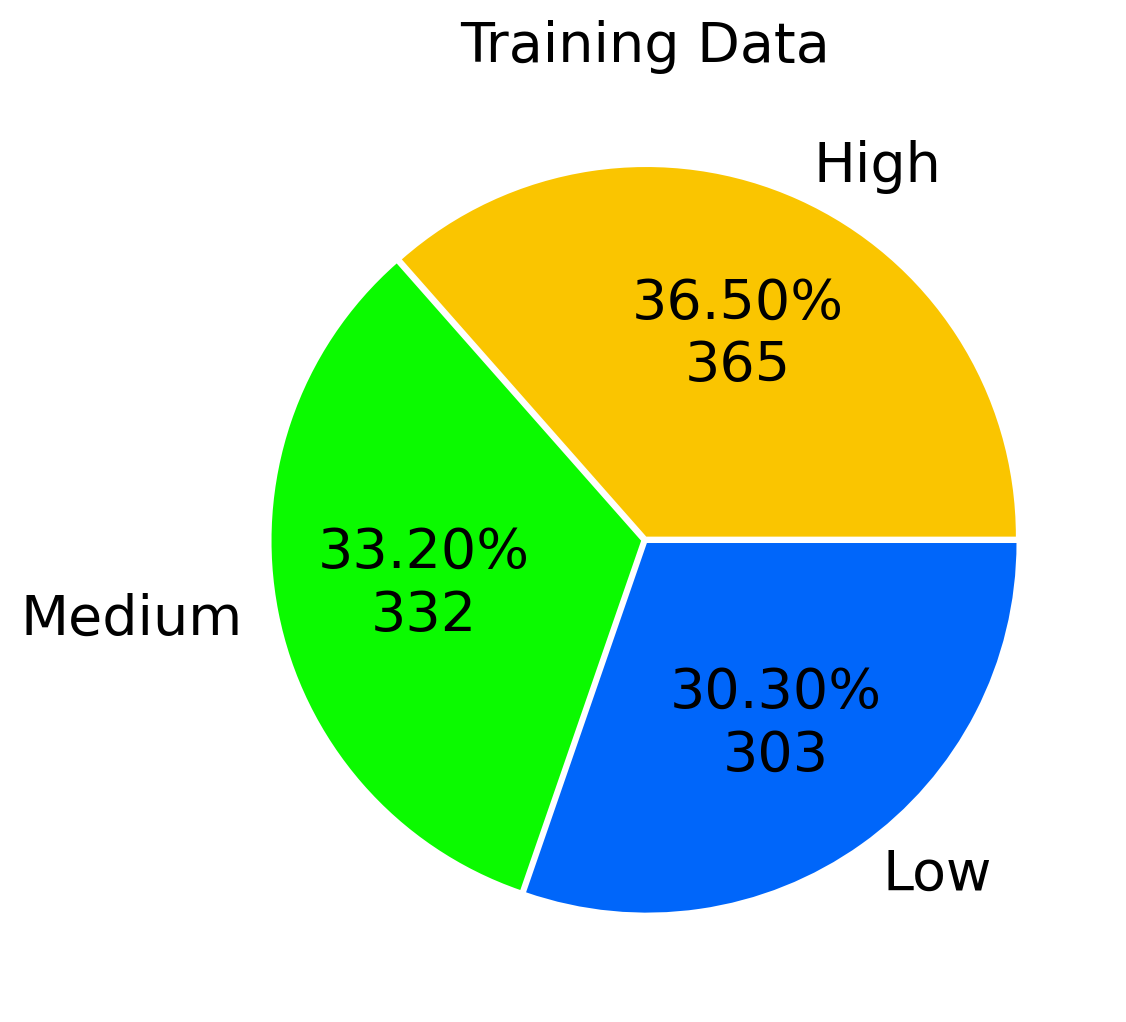

In [8]:
plt.figure(figsize=(6, 6))
plt.title('Training Data', fontsize=20)
plt.pie(df.level.value_counts(),
    labels=mapping.keys(),
    colors=['#FAC500','#0BFA00', '#0066FA','#FA0000'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(df.level.value_counts() /100)),
    explode=tuple(0.01 for i in range(3)),
    textprops={'fontsize': 20}
)
plt.show()


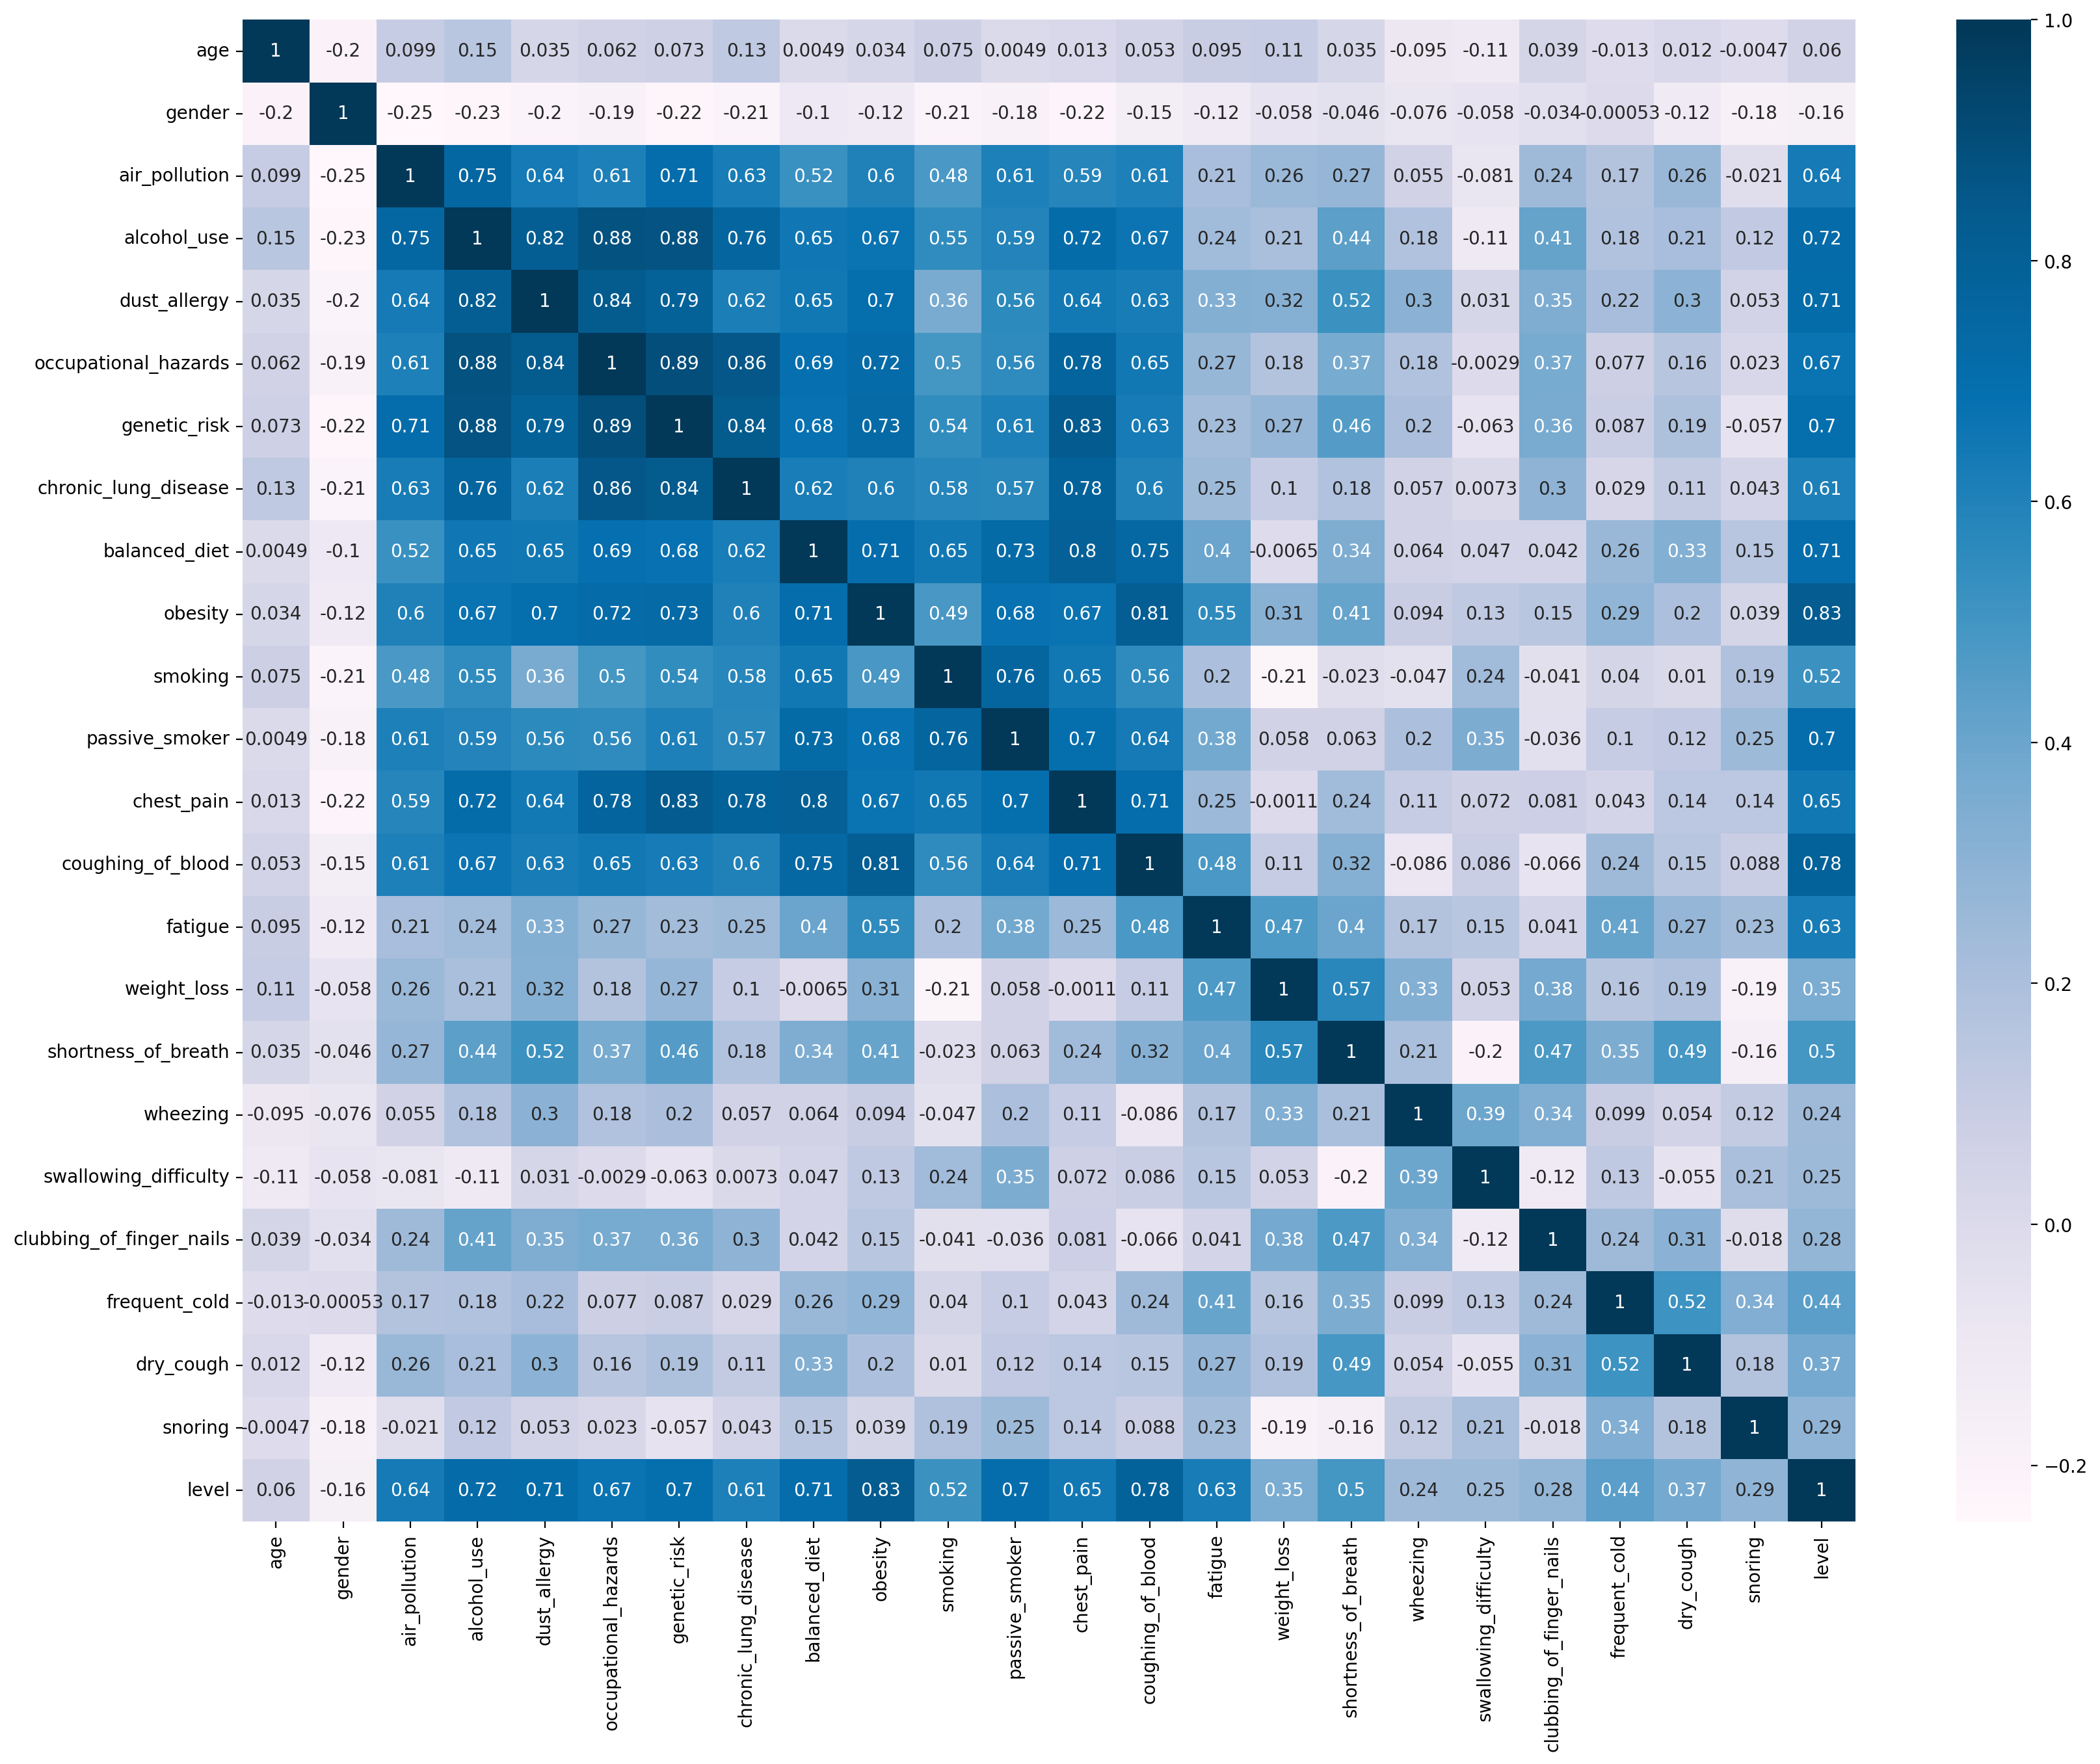

In [9]:
# Correlation plot
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu)
plt.show()



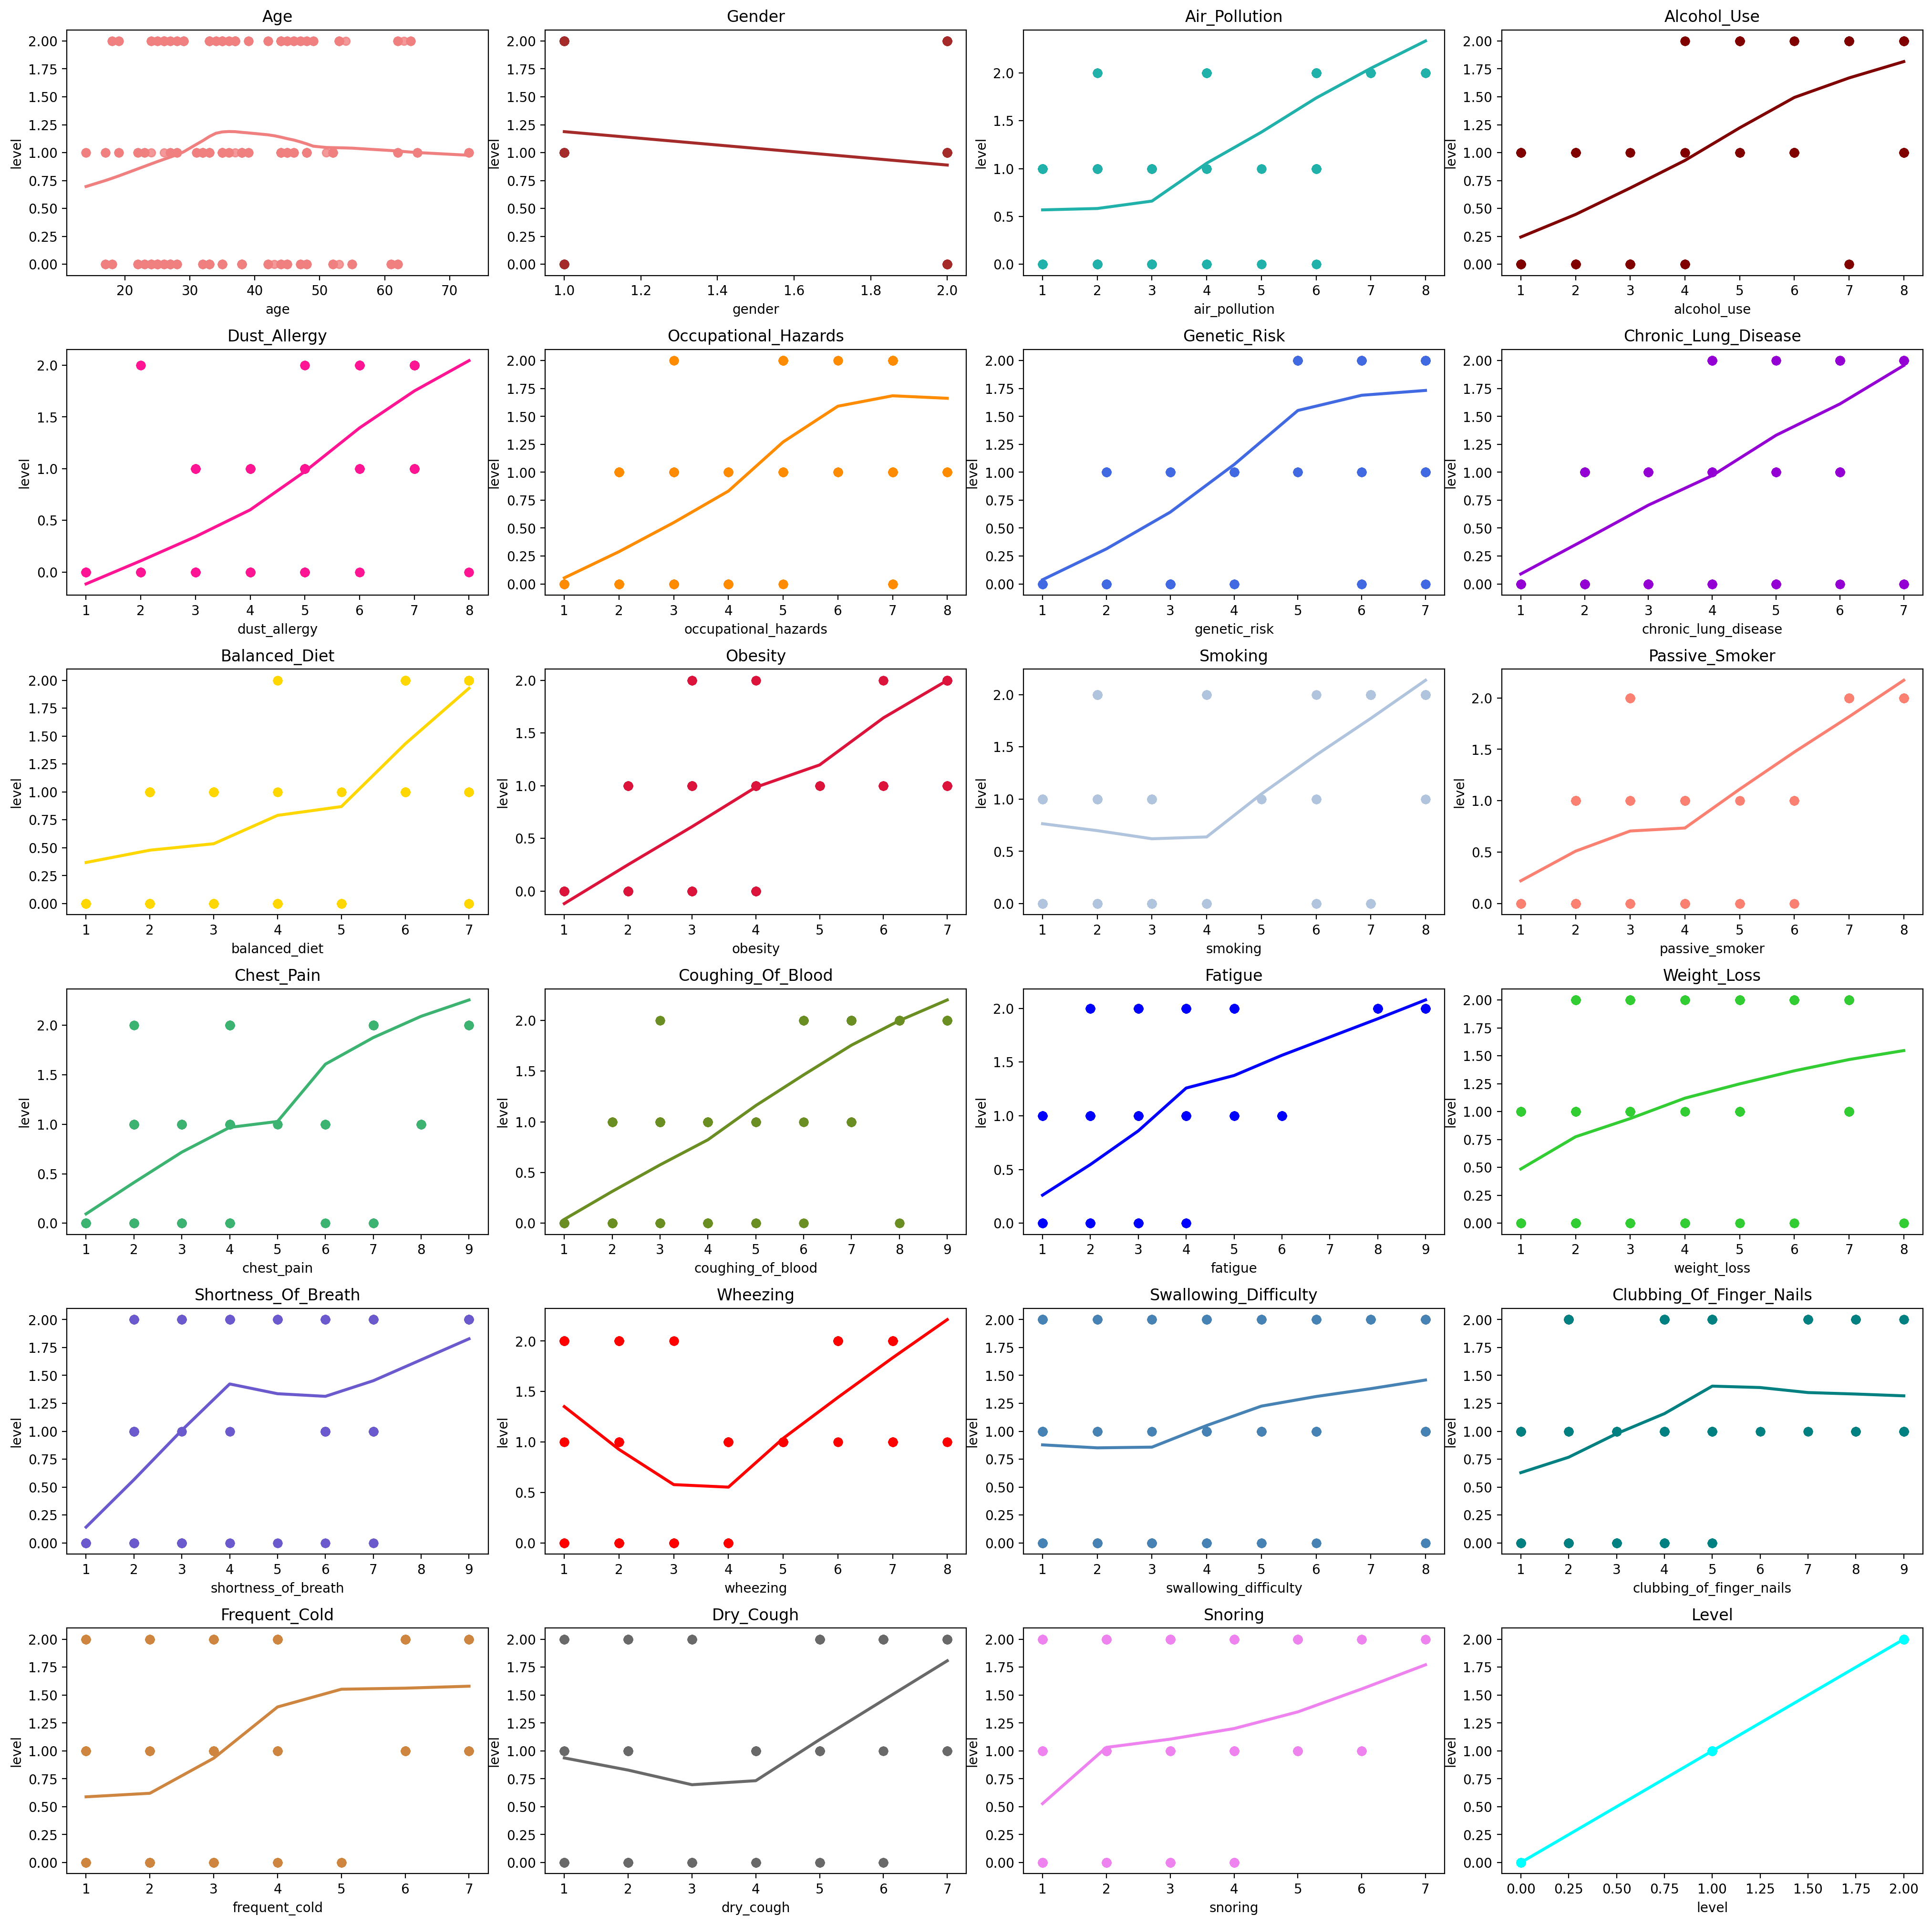

In [10]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.regplot(x=col, y='level', data=df, lowess=True, color=colors[i], ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.6, h_pad=1)
plt.show()

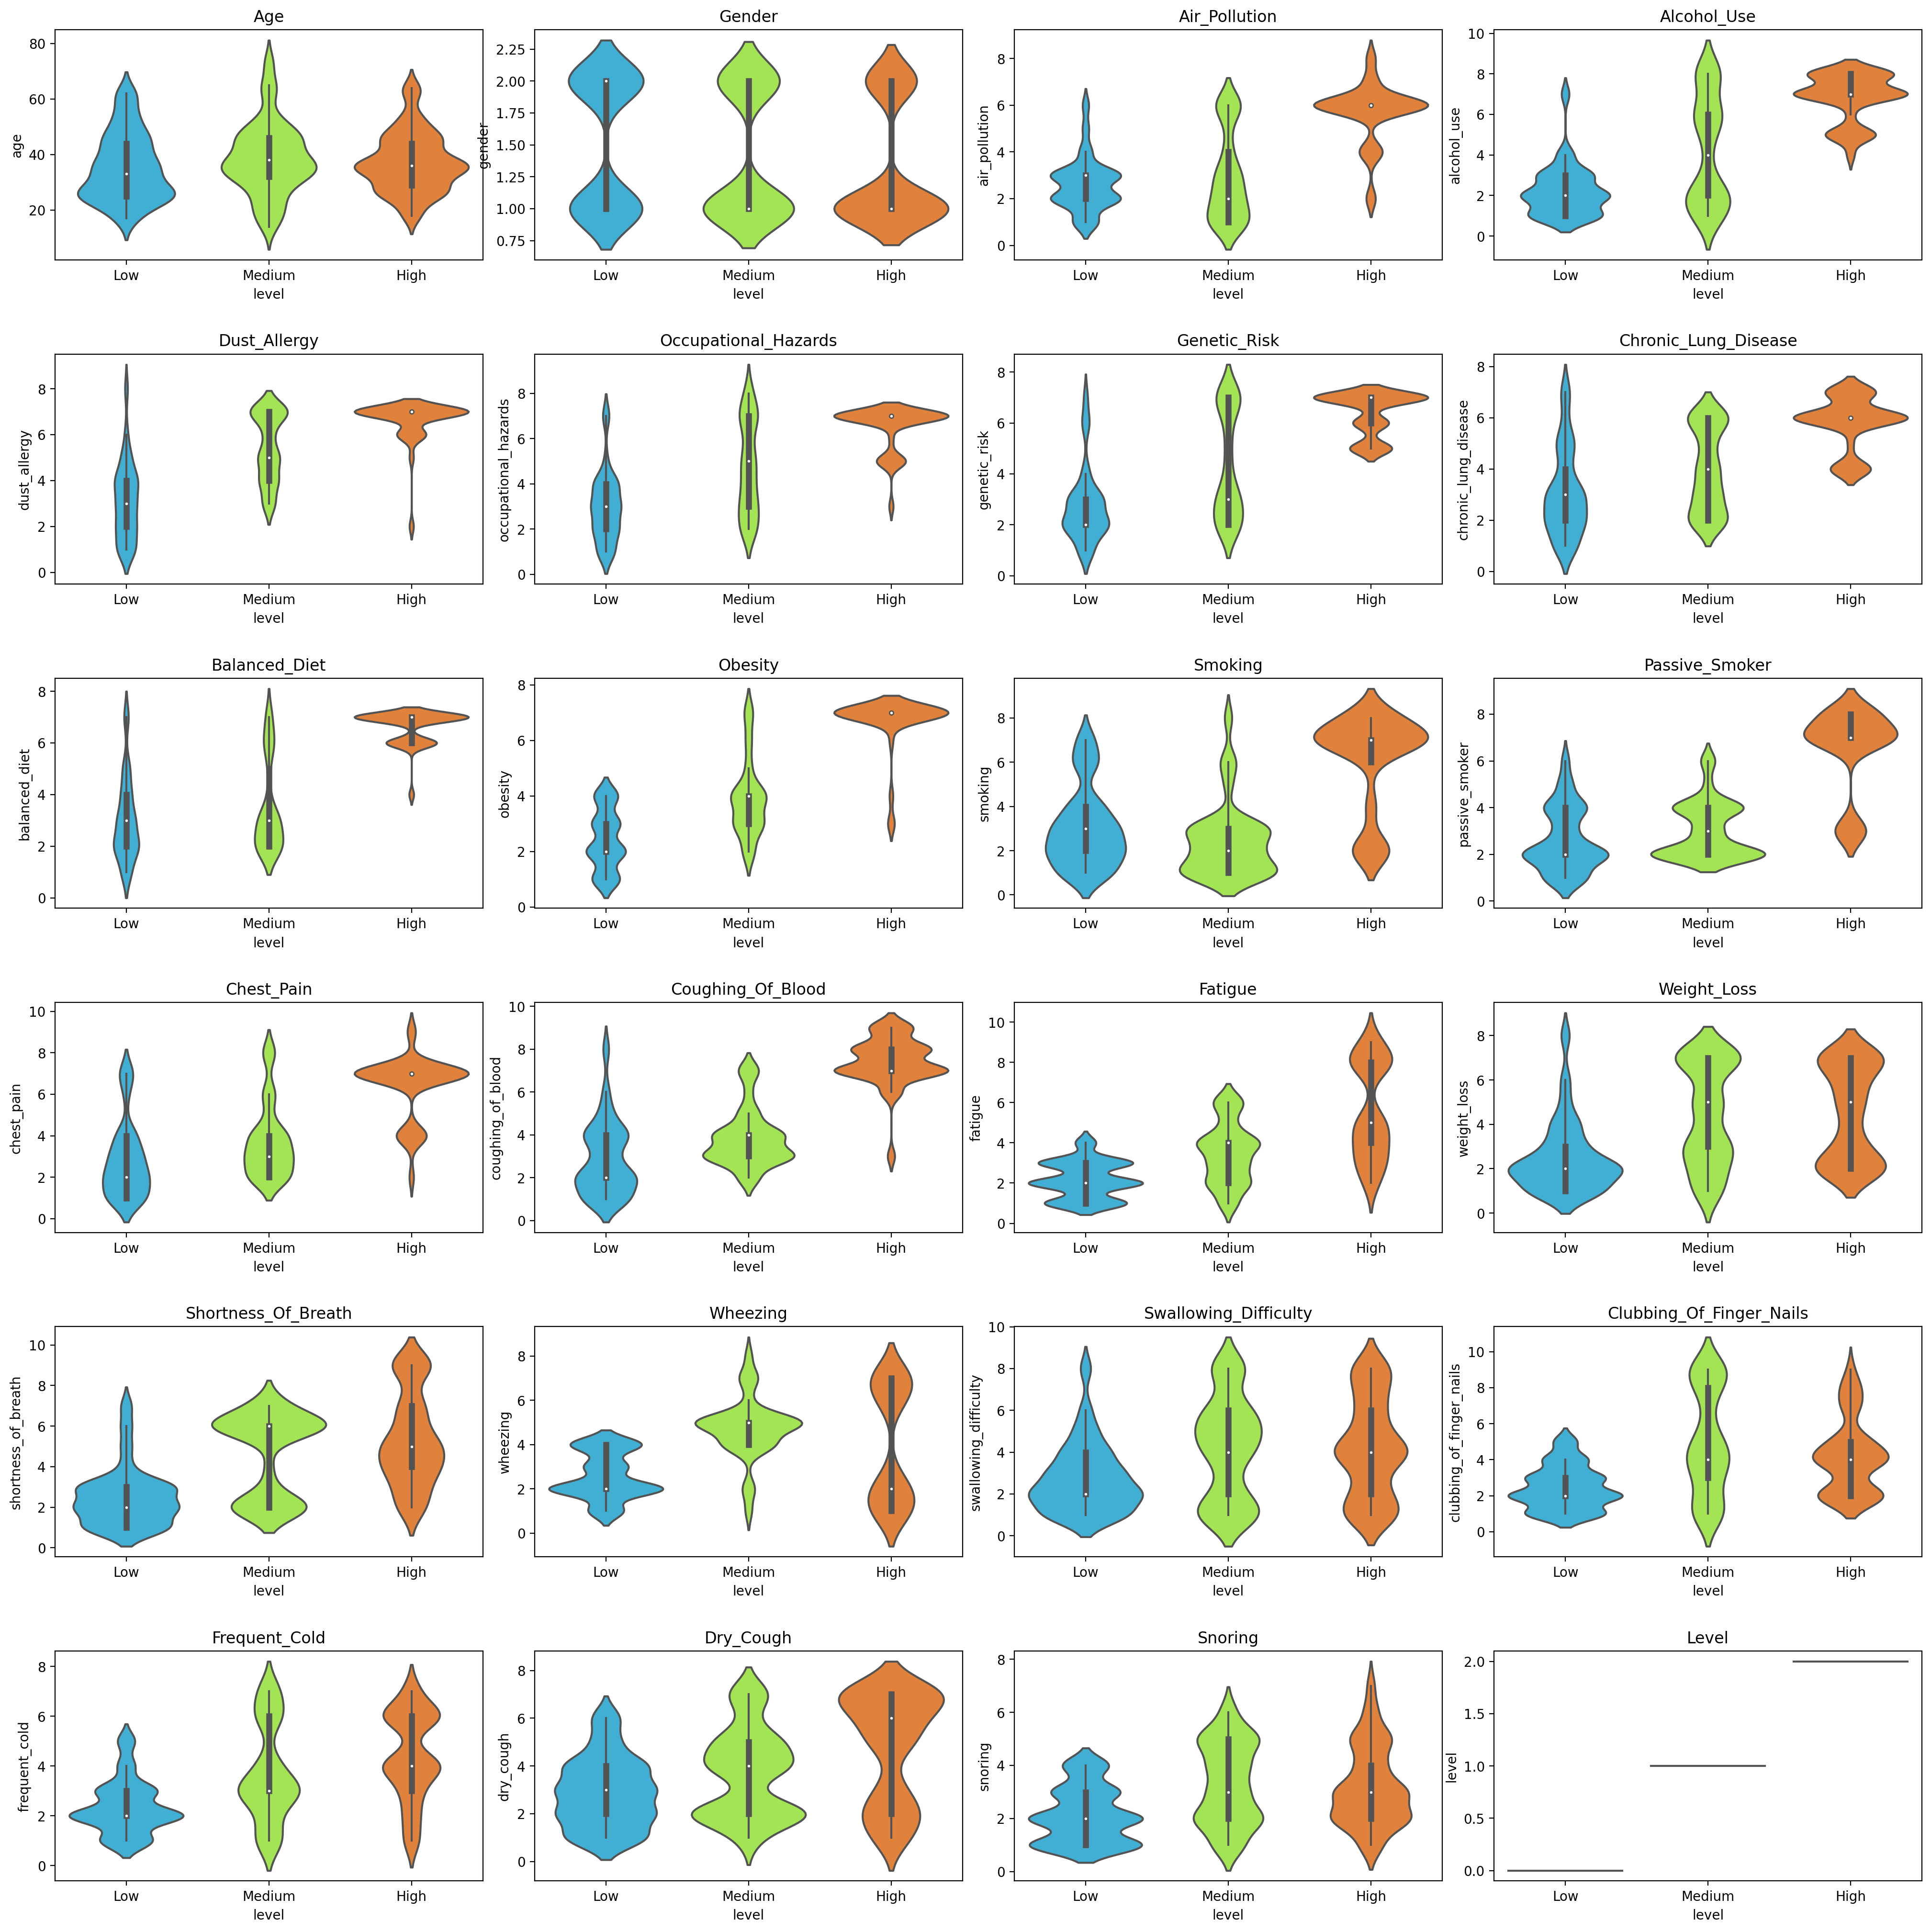

In [11]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.violinplot(x=df['level'].replace(dict(zip(mapping.values(), mapping.keys()))),
                   y=col, data=df, hue_order='level', palette='turbo', ax=ax[i])
    ax[i].set_title(col.title())
    
plt.tight_layout(pad=0.1, w_pad=0.2, h_pad=2.5)
plt.show()

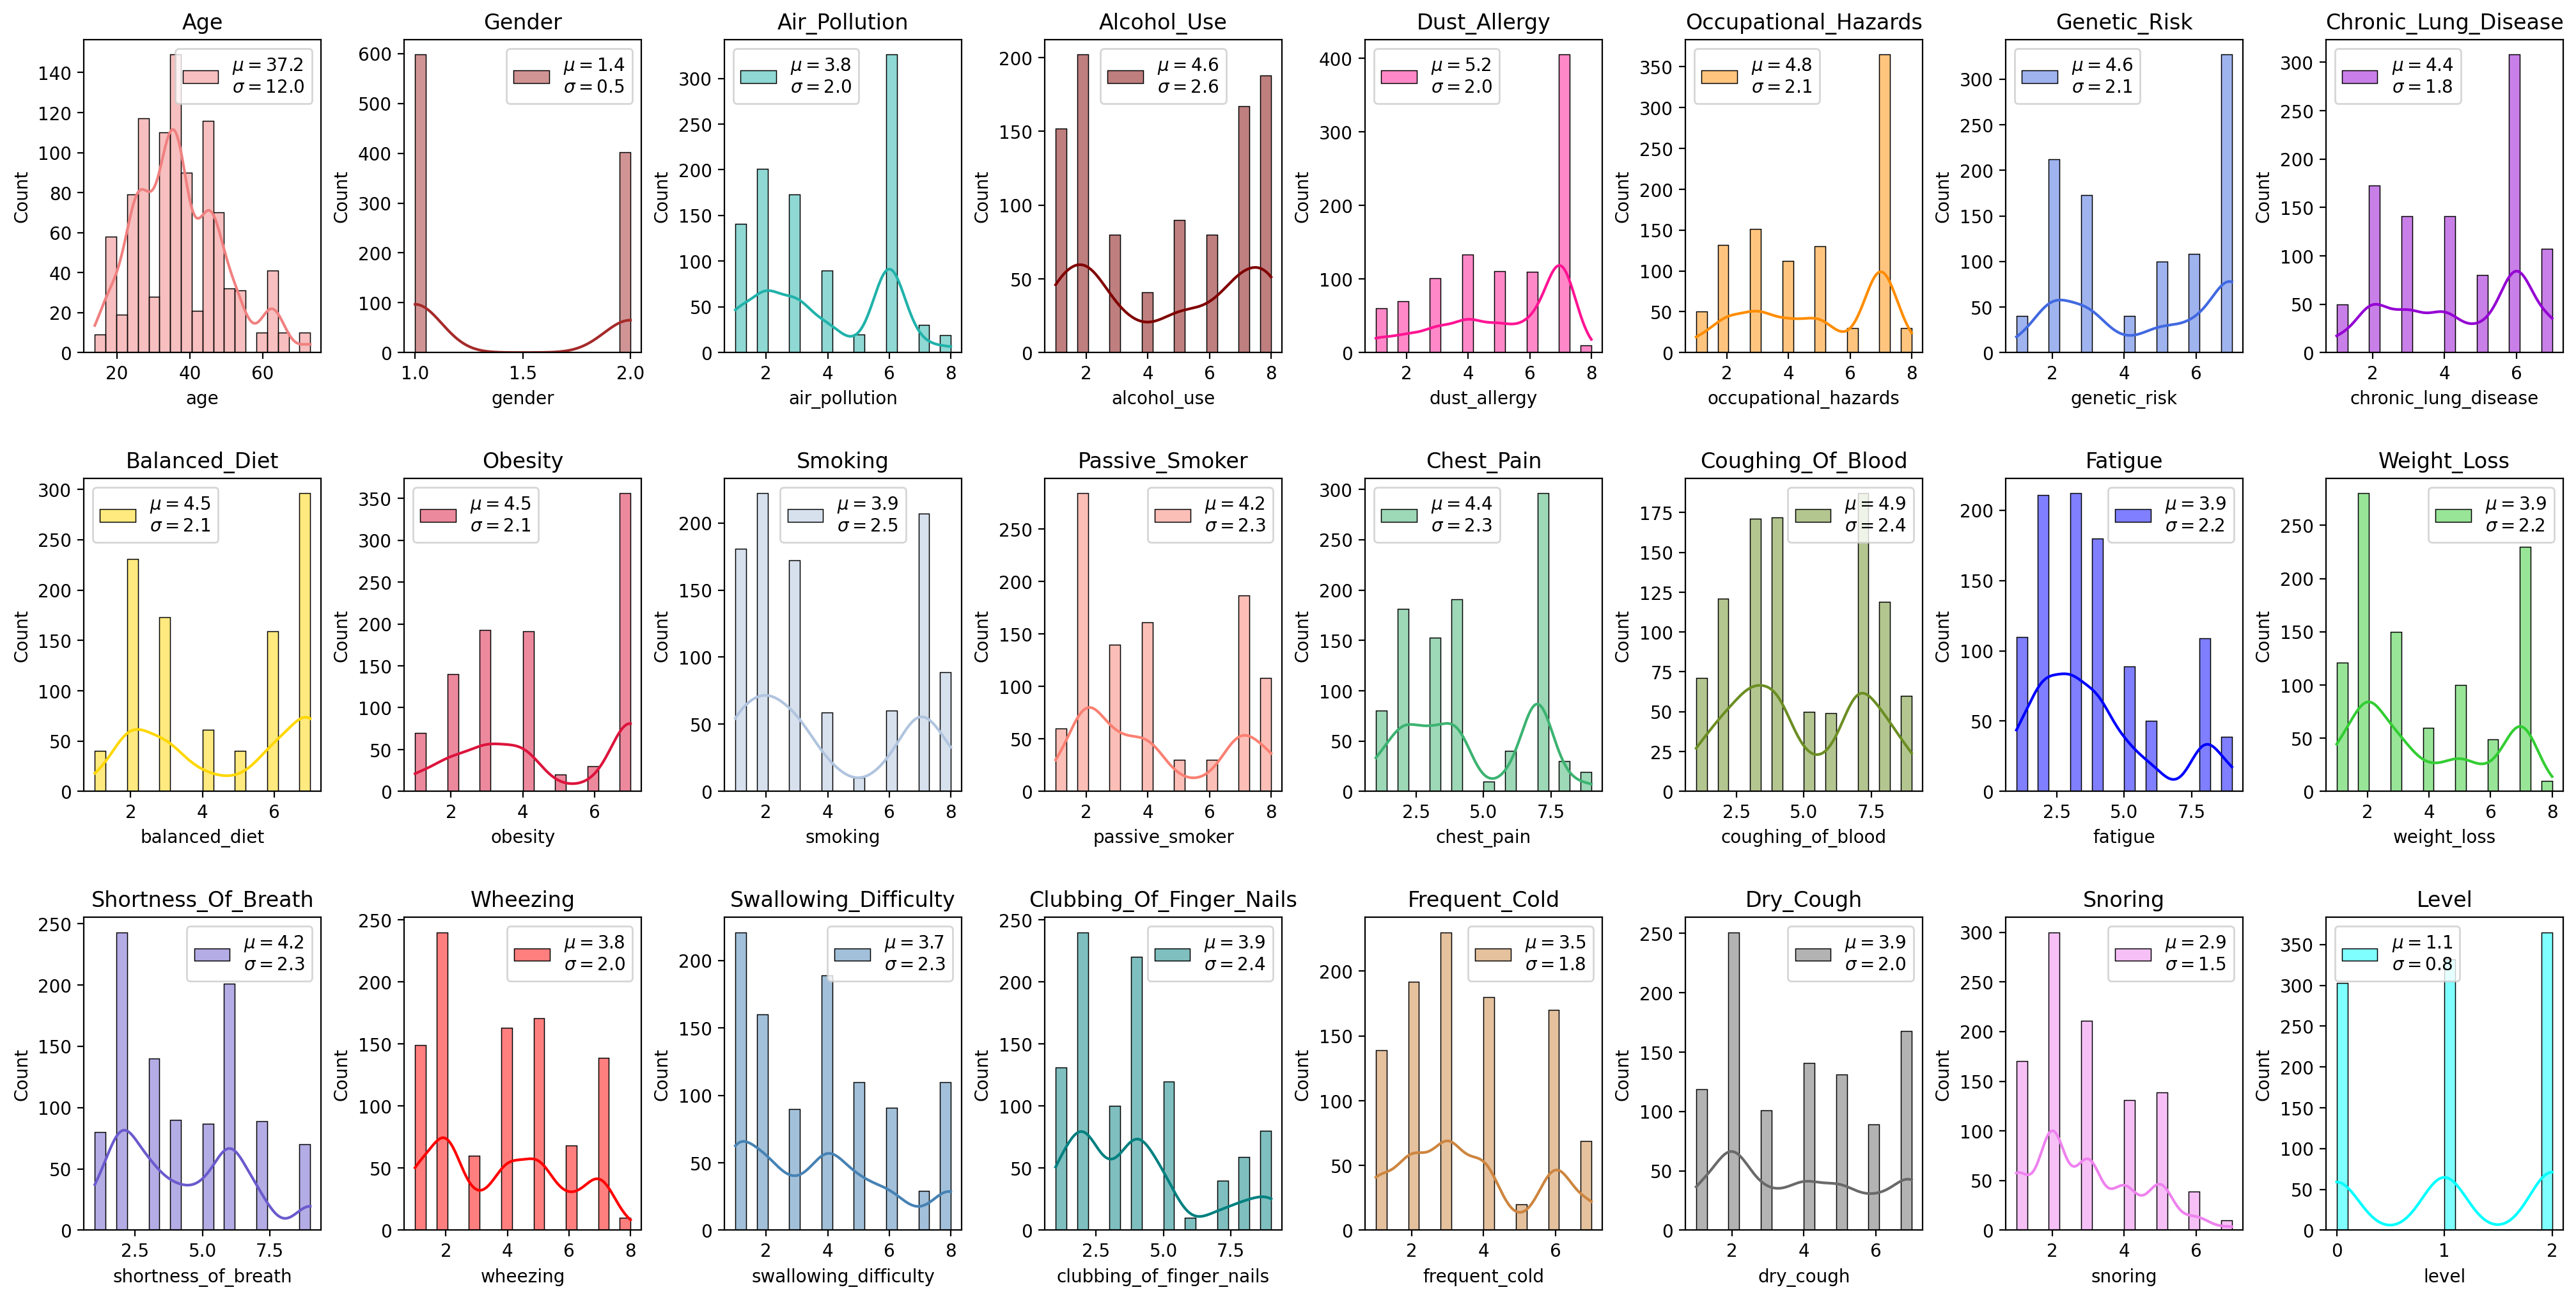

In [12]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")




fig, ax = plt.subplots(ncols=8, nrows=3, figsize=(20, 10))
ax = ax.flatten()
i = 0

for k, v in df.items():
    mu, sigma = norm.fit(v)
    sns.histplot(v,
                 kde=True,
                 bins=20,
                 color=colors[i],
                 ax=ax[i],
                 label=f'$\mu={mu:.1f}$\n$\sigma={sigma:.1f}$')
    ax[i].set_title(f'{k.title()}')
    ax[i].legend()
    i += 1
    
plt.tight_layout(pad=0.2, w_pad=0.2, h_pad=2.5)
plt.show()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(f'Shapes - X Training: {X_train.shape} and X Testing {X_test.shape}')
print(f'Shapes - Y Training: {y_train.shape} and Y Testing {y_test.shape}')

print(f'\nTraining output counts\n{y_train.value_counts()}')

Shapes - X Training: (700, 23) and X Testing (300, 23)
Shapes - Y Training: (700,) and Y Testing (300,)

Training output counts
level
2    248
1    233
0    219
Name: count, dtype: int64


In [14]:
def CM(y_true, y_pred, col_names=None, title=None):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=col_names, yticklabels=col_names, cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


C:\Users\himan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


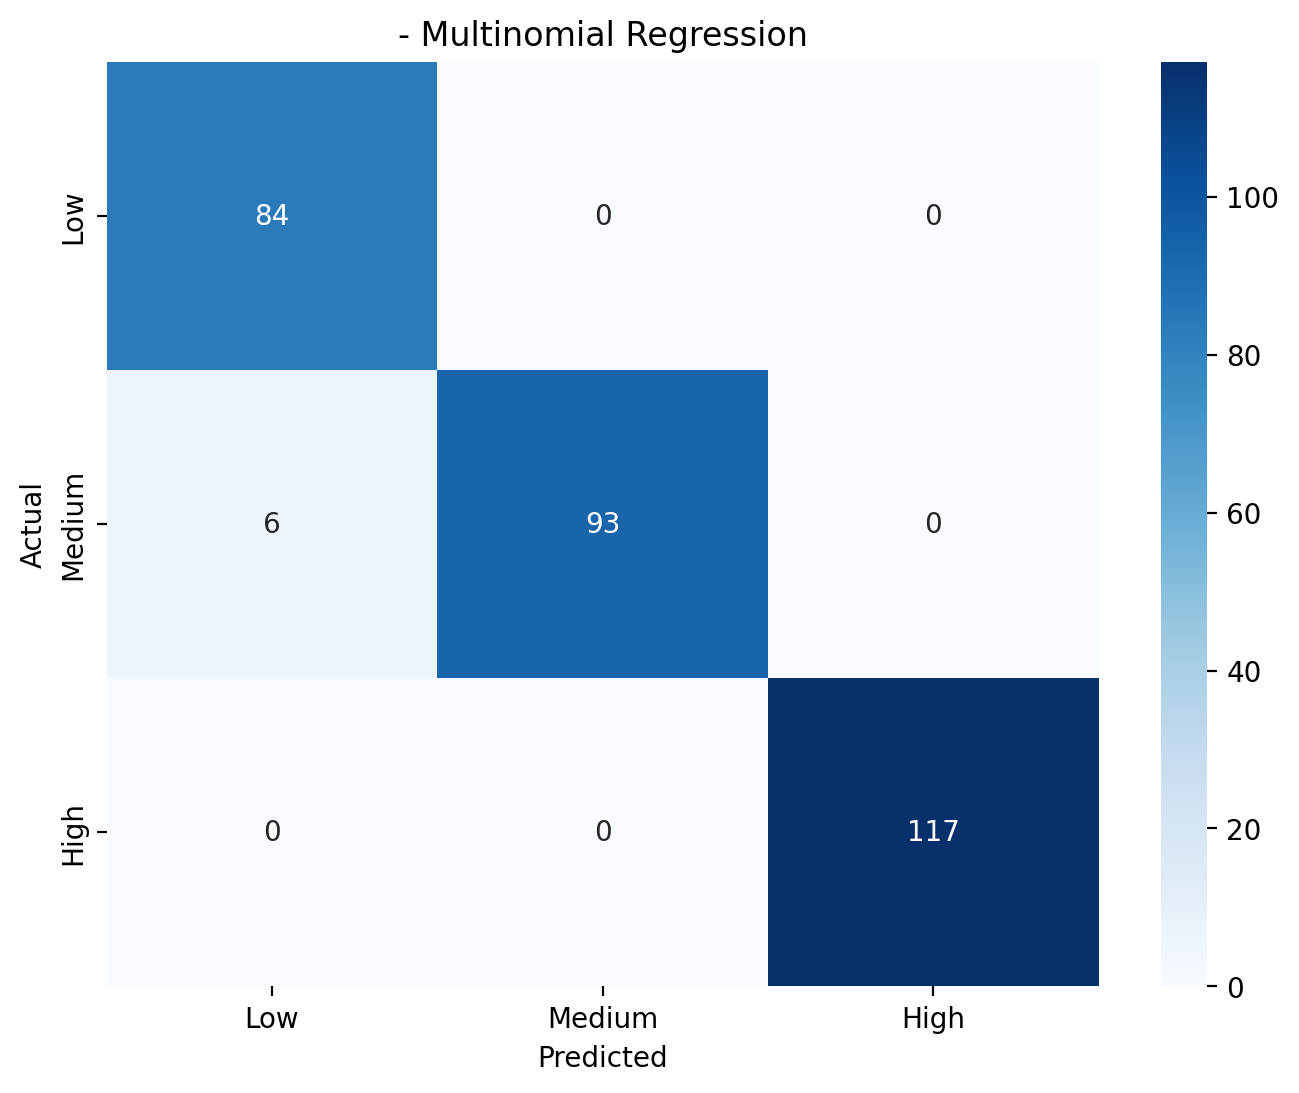

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        84
           1       1.00      0.94      0.97        99
           2       1.00      1.00      1.00       117

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [16]:
# Assuming you're using a Multinomial Logistic Regression model (e.g., LogisticRegression from sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Example fitting the model (replace X_train and y_train with your dataset)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Making predictions
MR_pred = model.predict(X_test)

# Now, you can call your CM function
CM(y_test, MR_pred, col_names=['Low', 'Medium', 'High'], title='- Multinomial Regression')

# Model report
ml_accuracies['Multinomial Model'] = accuracy_score(y_test, MR_pred)
print(classification_report(y_test, MR_pred))


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

def random_forest_n_best(X_train, y_train, X_test, y_test, n_list=np.arange(1, 20, 1)):
    """
    Evaluate the Random Forest model's accuracy for different values of n_estimators.
    
    Parameters:
    - X_train: Training features
    - y_train: Training labels
    - X_test: Testing features
    - y_test: Testing labels
    - n_list: List or array of n_estimators values to evaluate
    
    Returns:
    - best_n: The value of n_estimators with the highest accuracy
    - best_acc: The corresponding accuracy
    """
    accuracies = []
    
    for n in n_list:
        # Define the model with n_estimators
        RF = RandomForestClassifier(n_estimators=n, random_state=42)
        
        # Fit the model to training data
        RF.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = RF.predict(X_test)
        
        # Calculate accuracy
        acc = accuracy_score(y_test, y_pred)
        accuracies.append(acc)
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(n_list, accuracies, marker='o', linestyle='-', color='b', label='Accuracy')
    plt.title("Random Forest Accuracy vs. Number of Trees")
    plt.xlabel("Number of Trees (n_estimators)")
    plt.ylabel("Accuracy")
    plt.xticks(n_list)
    plt.grid()
    plt.legend()
    plt.show()
    
    # Find and print the best n
    best_n = n_list[np.argmax(accuracies)]
    best_acc = max(accuracies)
    print(f"Best n_estimators: {best_n} with accuracy: {best_acc:.4f}")
    
    return best_n, best_acc


In [18]:
# Define model and set random_state
RF = RandomForestClassifier(n_estimators=3, random_state=40)

# fitting model
RF.fit(X_train, y_train)

# predicting with model
RF_pred = RF.predict(X_test)
pd.Series(RF_pred).value_counts()

2    117
1     99
0     84
Name: count, dtype: int64

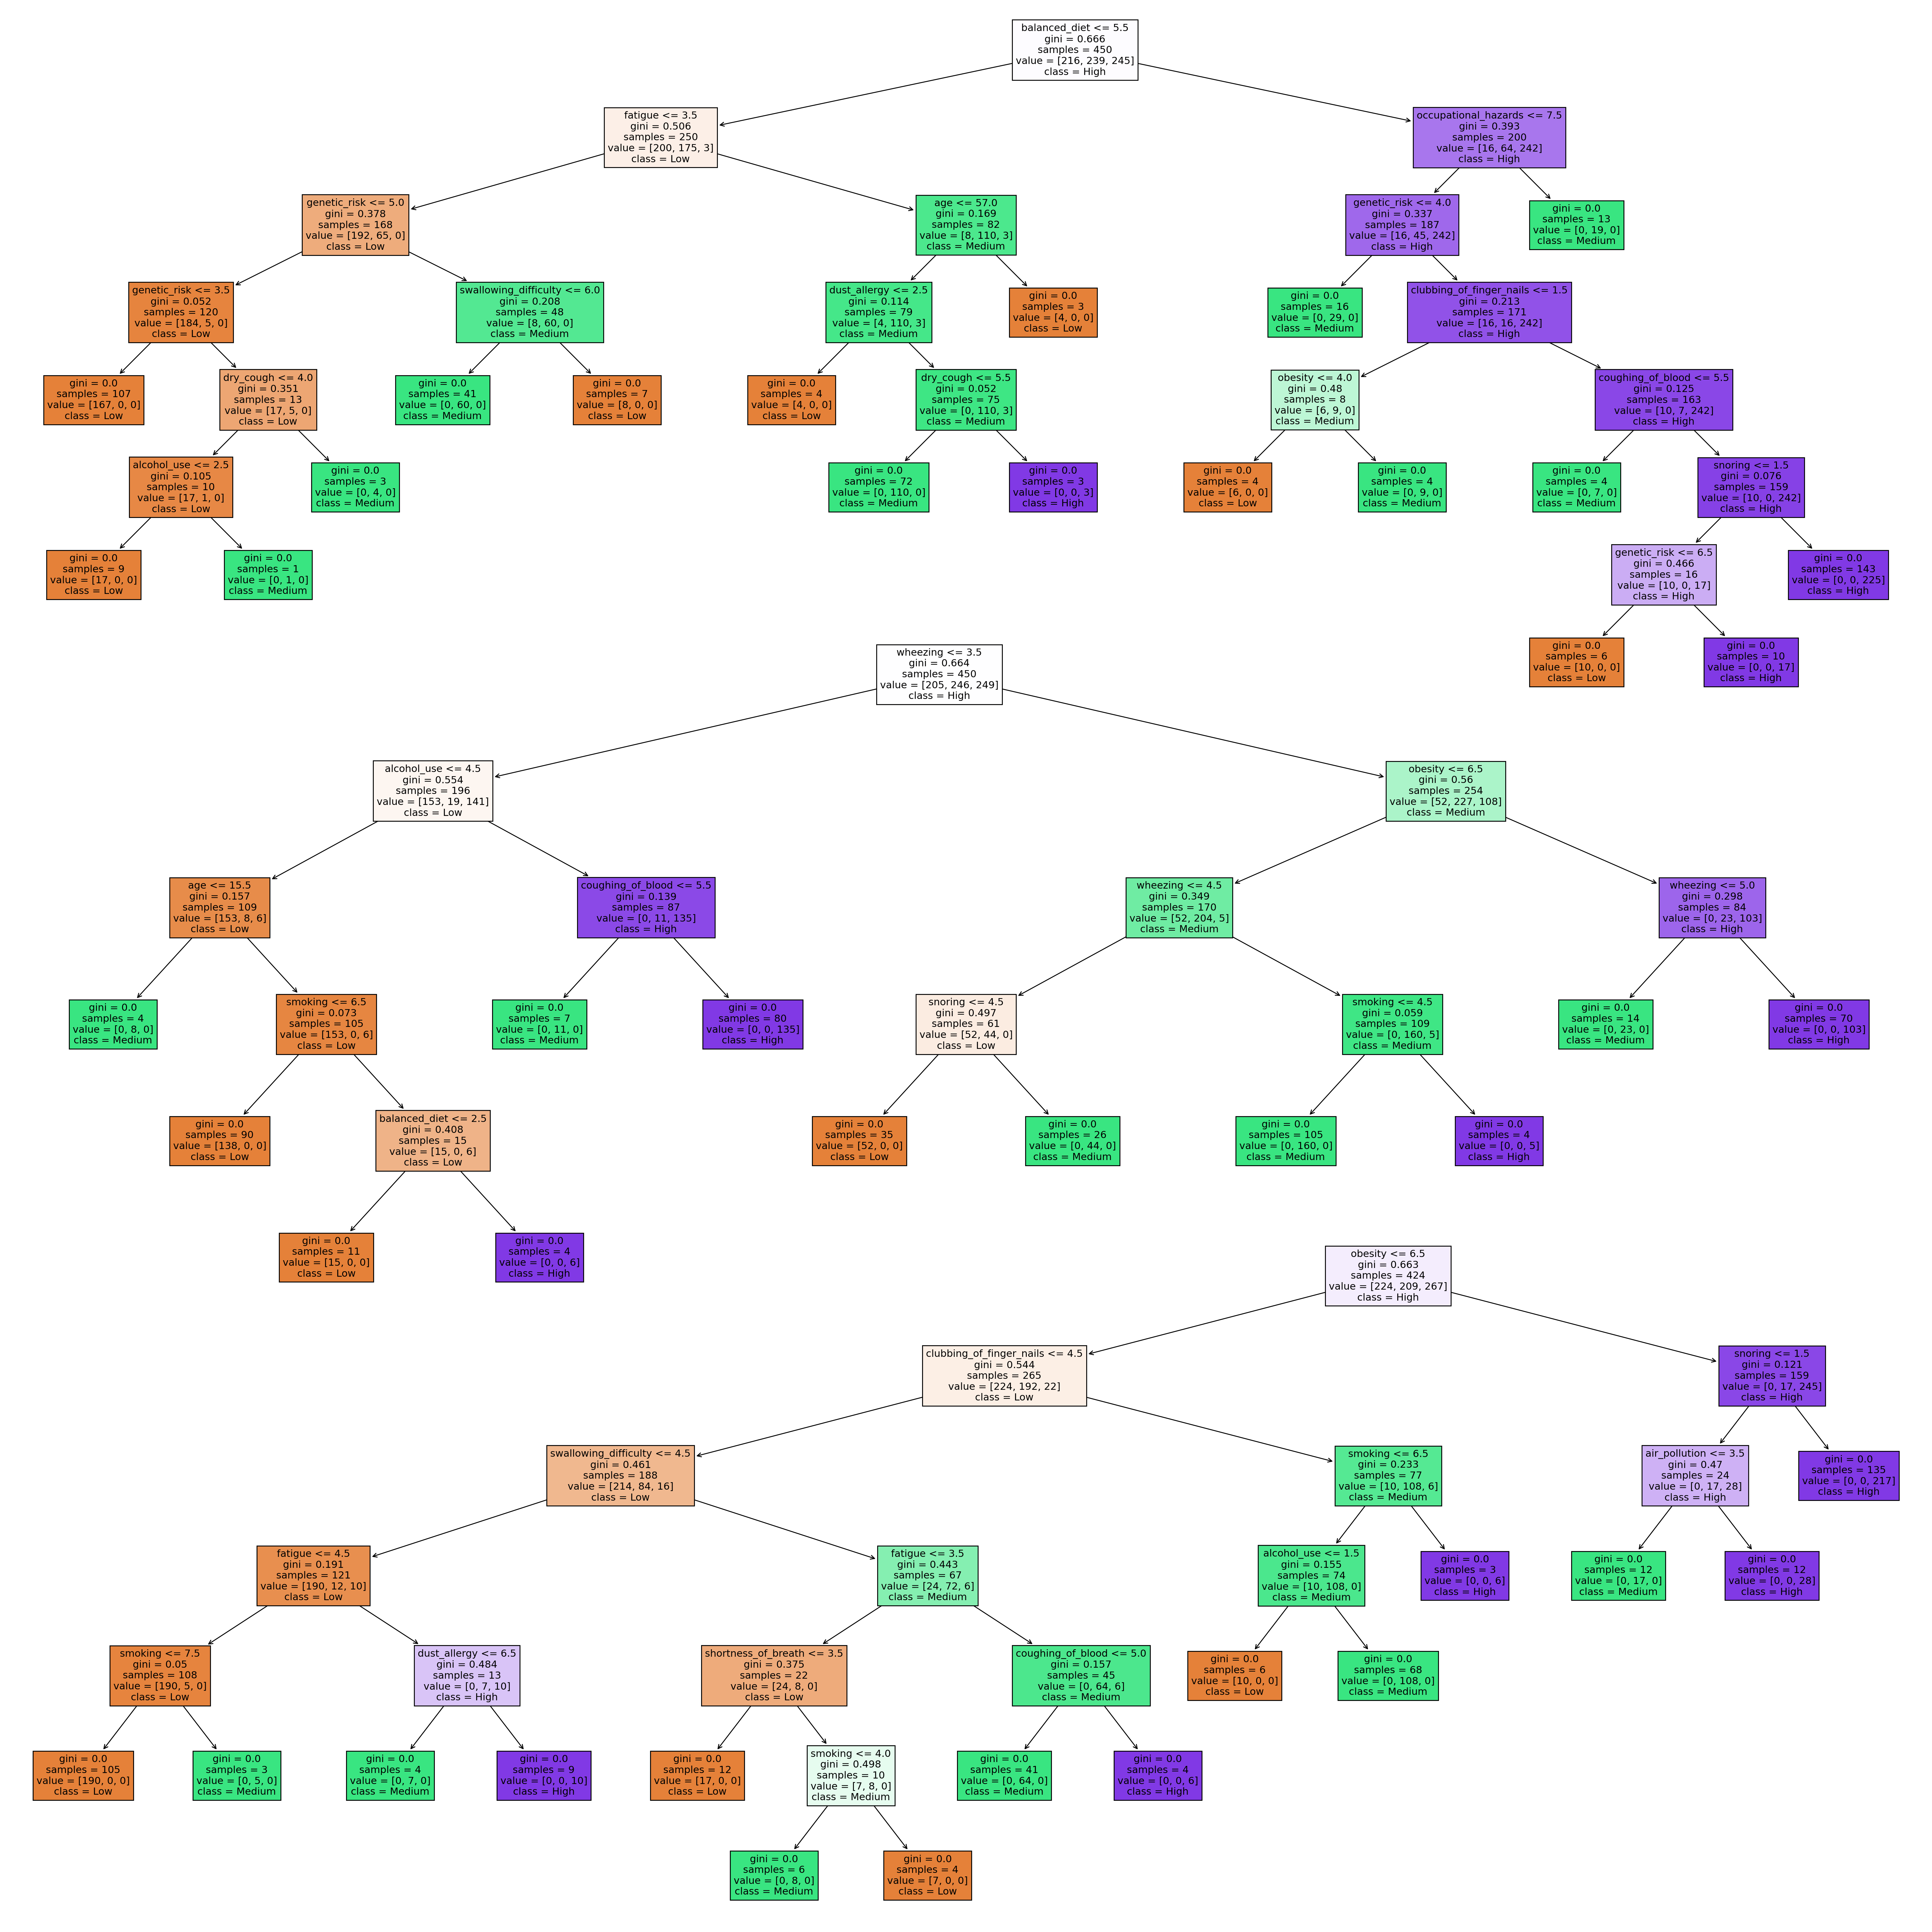

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

# Convert feature names to a list
feature_names = list(X.columns)

trees = len(RF.estimators_)
cn = ['Low', 'Medium', 'High']

# Adjust the number of axes dynamically
fig, ax = plt.subplots(trees, 1, figsize=(30, 10 * trees))

for i, forest in enumerate(RF.estimators_):
    if trees > 1:
        tree.plot_tree(forest,
                       feature_names=feature_names,  # Use list here
                       class_names=cn,
                       filled=True,
                       fontsize=11,
                       ax=ax[i])
    else:
        tree.plot_tree(forest,
                       feature_names=feature_names,  # Use list here
                       class_names=cn,
                       filled=True,
                       fontsize=11)

plt.tight_layout(h_pad=-10)
plt.show()


In [24]:
# Train Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions using Naive Bayes
nb_pred = nb_model.predict(X_test)

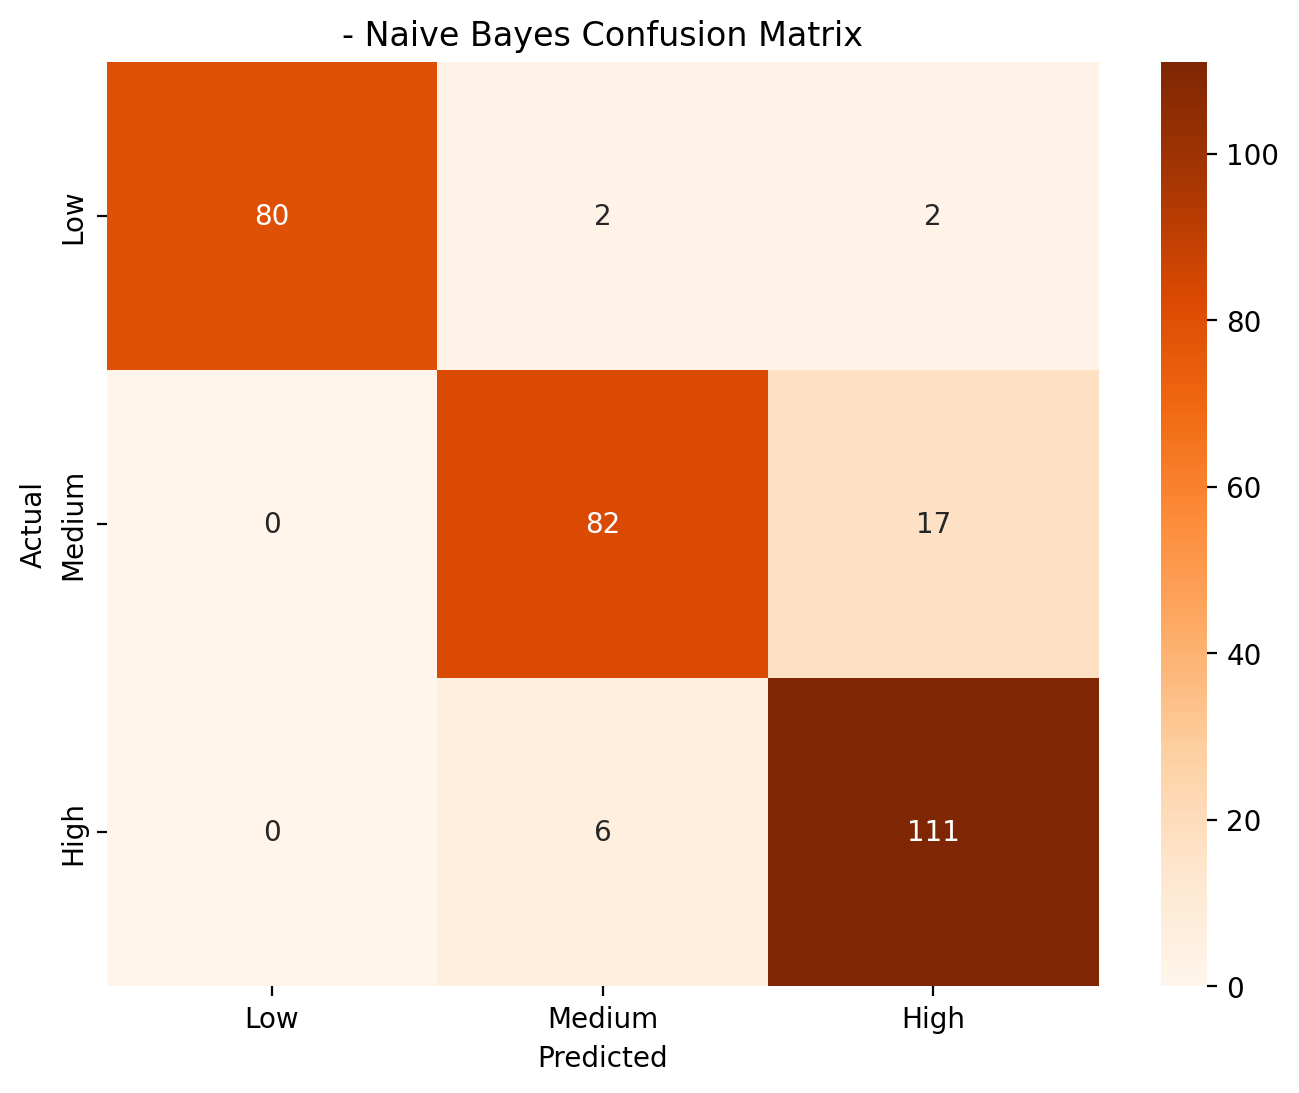

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [25]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, nb_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Low', 'Medium', 'High'], 
            yticklabels=['Low', 'Medium', 'High'])
plt.title('- Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
ml_accuracies['Naive Bayes'] = accuracy_score(y_test, nb_pred)
print("Classification Report:")
print(classification_report(y_test, nb_pred))


In [31]:
# Display models with accuracy < 100%
print("Models with accuracy less than 100%:")
for model, acc in ml_accuracies.items():
    if acc < 1.0:
        print(f"{model}: {acc * 100:.2f}%")


Models with accuracy less than 100%:
Multinomial Model: 98.00%
Naive Bayes: 91.00%


Simple Random Forest Accuracy: 91.33333333333333


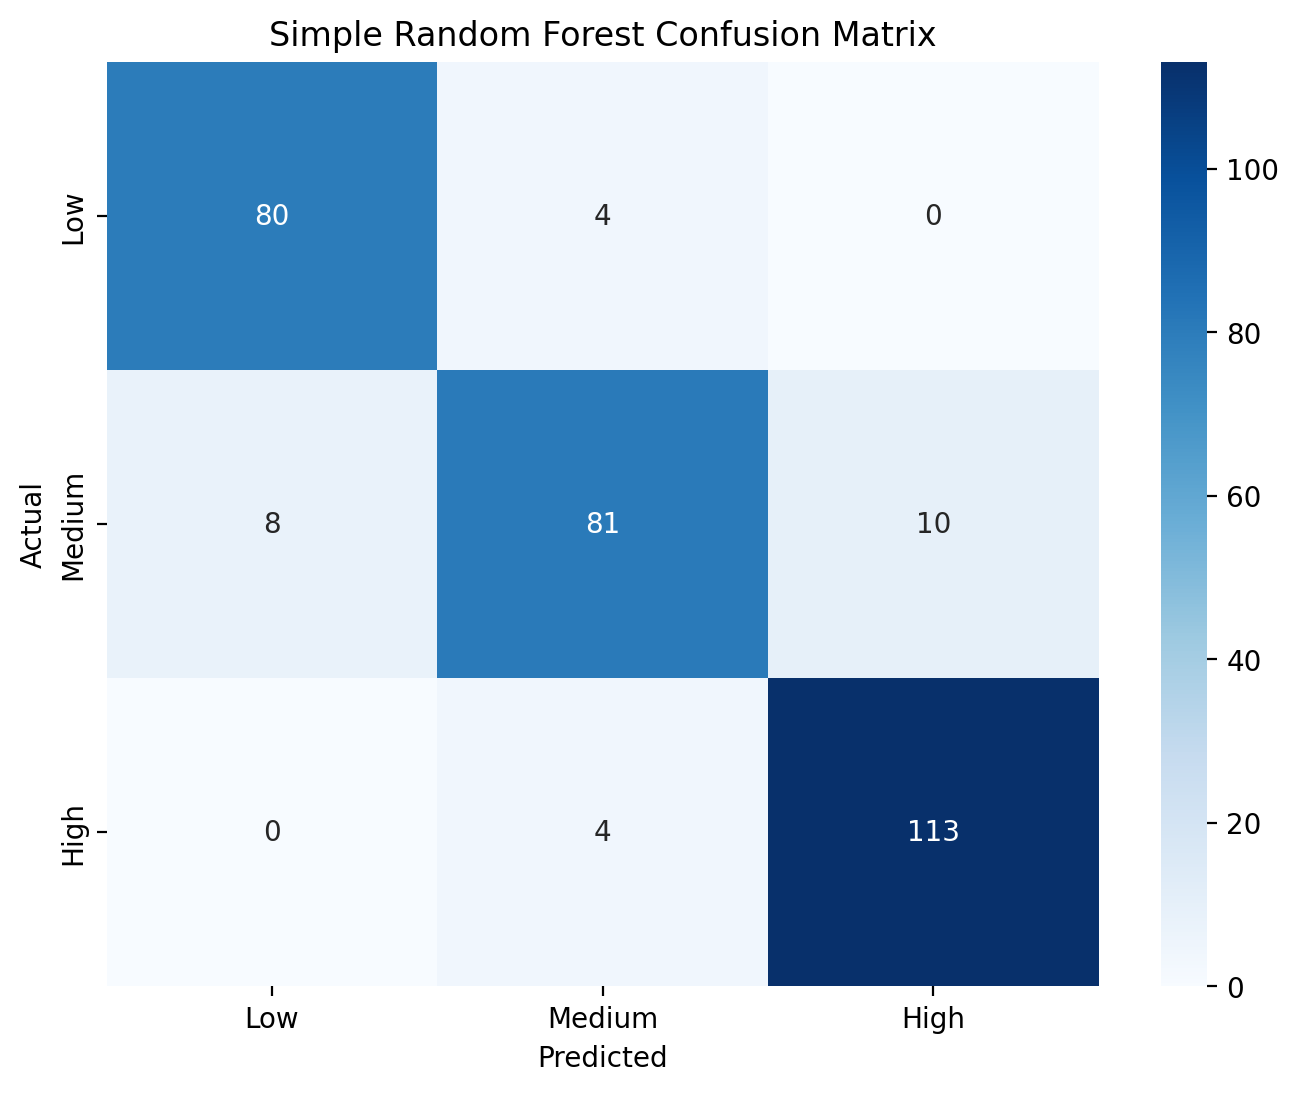

Classification Report for Simple Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        84
           1       0.91      0.82      0.86        99
           2       0.92      0.97      0.94       117

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Simple Random Forest with fewer estimators and limited depth
rf_simple = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=42)
rf_simple.fit(X_train, y_train)

# Predictions using the simplified Random Forest
rf_pred_simple = rf_simple.predict(X_test)

# Accuracy and confusion matrix
ml_accuracies['Simple Random Forest'] = accuracy_score(y_test, rf_pred_simple)
print("Simple Random Forest Accuracy:", ml_accuracies['Simple Random Forest'] * 100)

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred_simple)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Simple Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report for Simple Random Forest:")
print(classification_report(y_test, rf_pred_simple))


C:\Users\himan\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (Noisy) Accuracy: 98.66666666666667


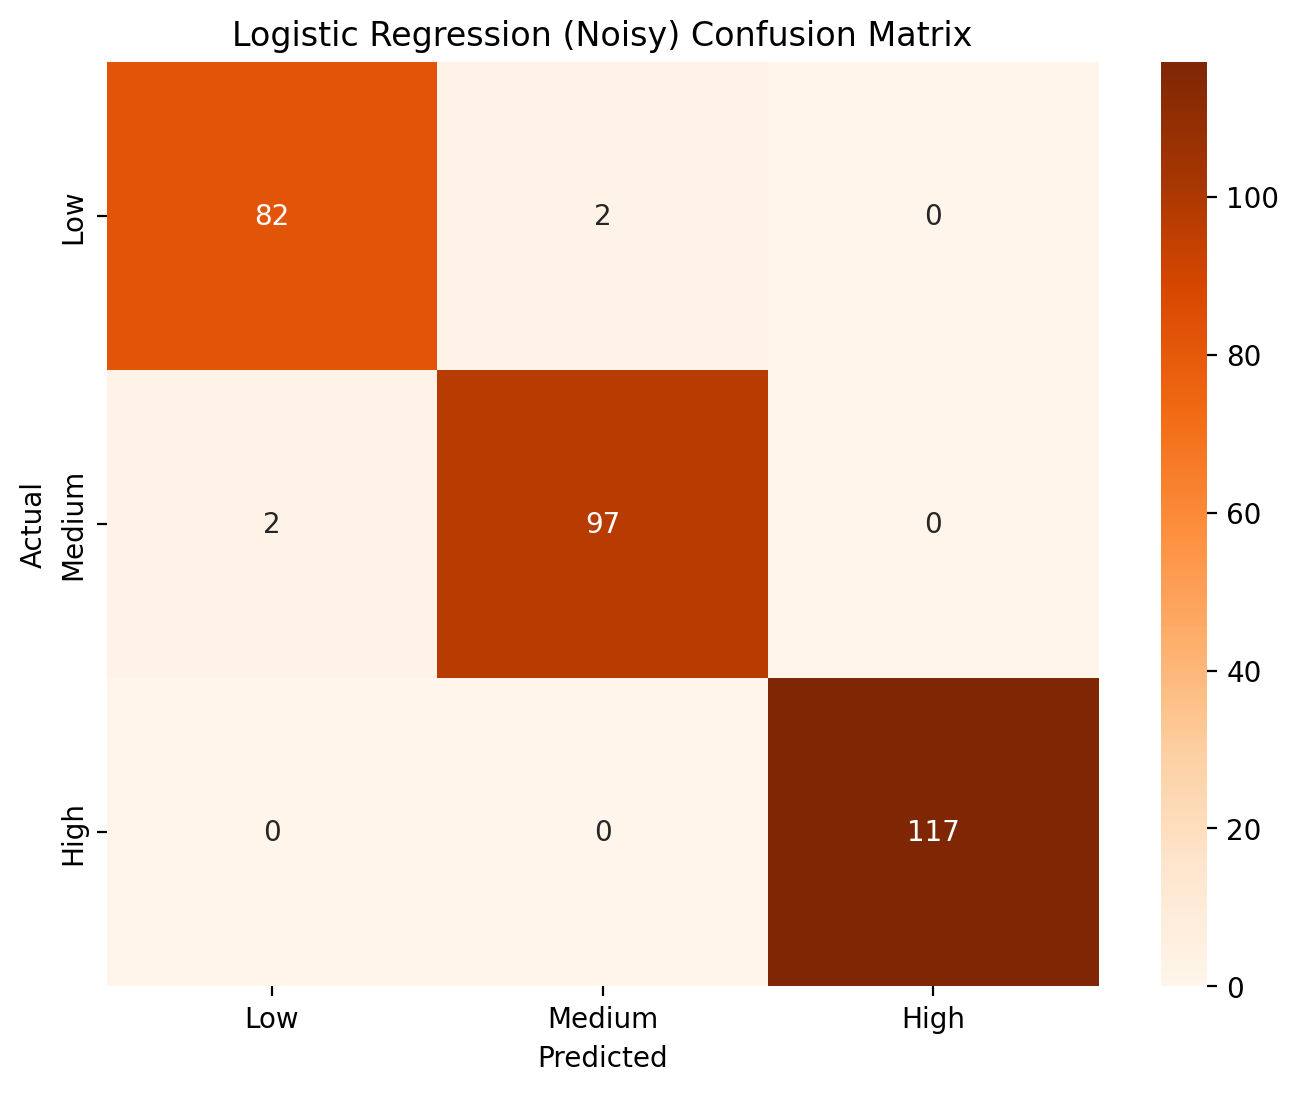

Classification Report for Logistic Regression (Noisy):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        84
           1       0.98      0.98      0.98        99
           2       1.00      1.00      1.00       117

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [37]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Add noise to the training and test data
X_train_noisy = X_train + np.random.normal(0, 0.1, X_train.shape)
X_test_noisy = X_test + np.random.normal(0, 0.1, X_test.shape)

# Train Logistic Regression on noisy data
lr_noisy = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr_noisy.fit(X_train_noisy, y_train)

# Predictions using Logistic Regression on noisy data
lr_pred_noisy = lr_noisy.predict(X_test_noisy)

# Accuracy and confusion matrix
ml_accuracies['Logistic Regression (Noisy)'] = accuracy_score(y_test, lr_pred_noisy)
print("Logistic Regression (Noisy) Accuracy:", ml_accuracies['Logistic Regression (Noisy)'] * 100)

# Confusion matrix
cm = confusion_matrix(y_test, lr_pred_noisy)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Logistic Regression (Noisy) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report for Logistic Regression (Noisy):")
print(classification_report(y_test, lr_pred_noisy))


Decision Tree Accuracy: 95.33333333333334


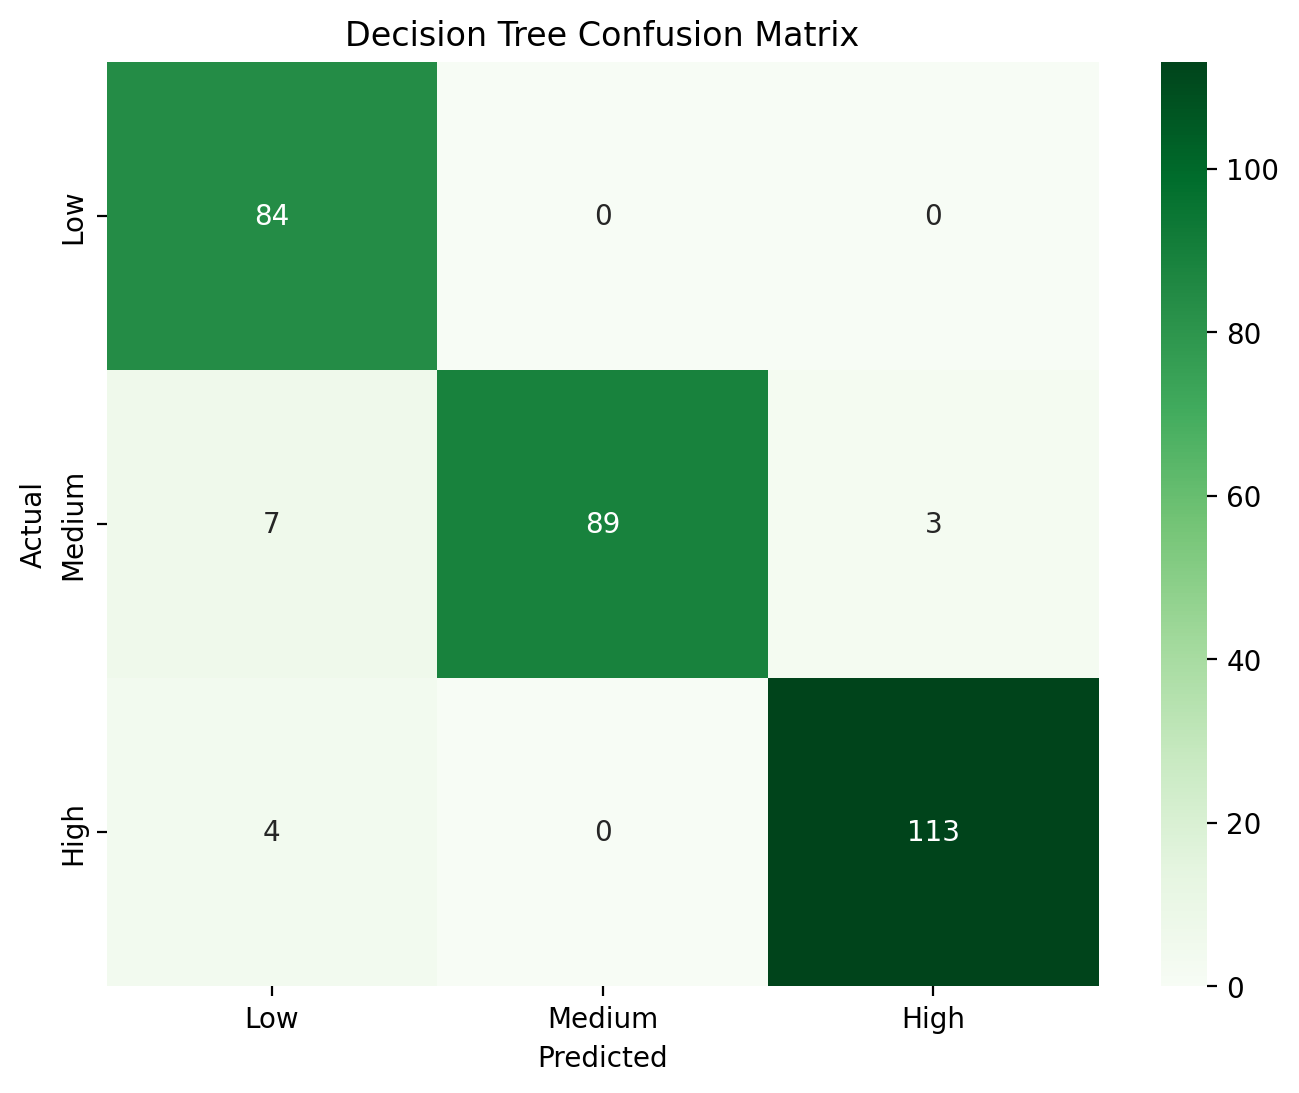

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        84
           1       1.00      0.90      0.95        99
           2       0.97      0.97      0.97       117

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



In [38]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree with limited depth
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions and accuracy
dt_pred = dt_model.predict(X_test)
ml_accuracies['Decision Tree'] = accuracy_score(y_test, dt_pred)

# Display accuracy
print("Decision Tree Accuracy:", ml_accuracies['Decision Tree'] * 100)

# Confusion matrix
cm = confusion_matrix(y_test, dt_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))


Naive Bayes Accuracy: 91.0


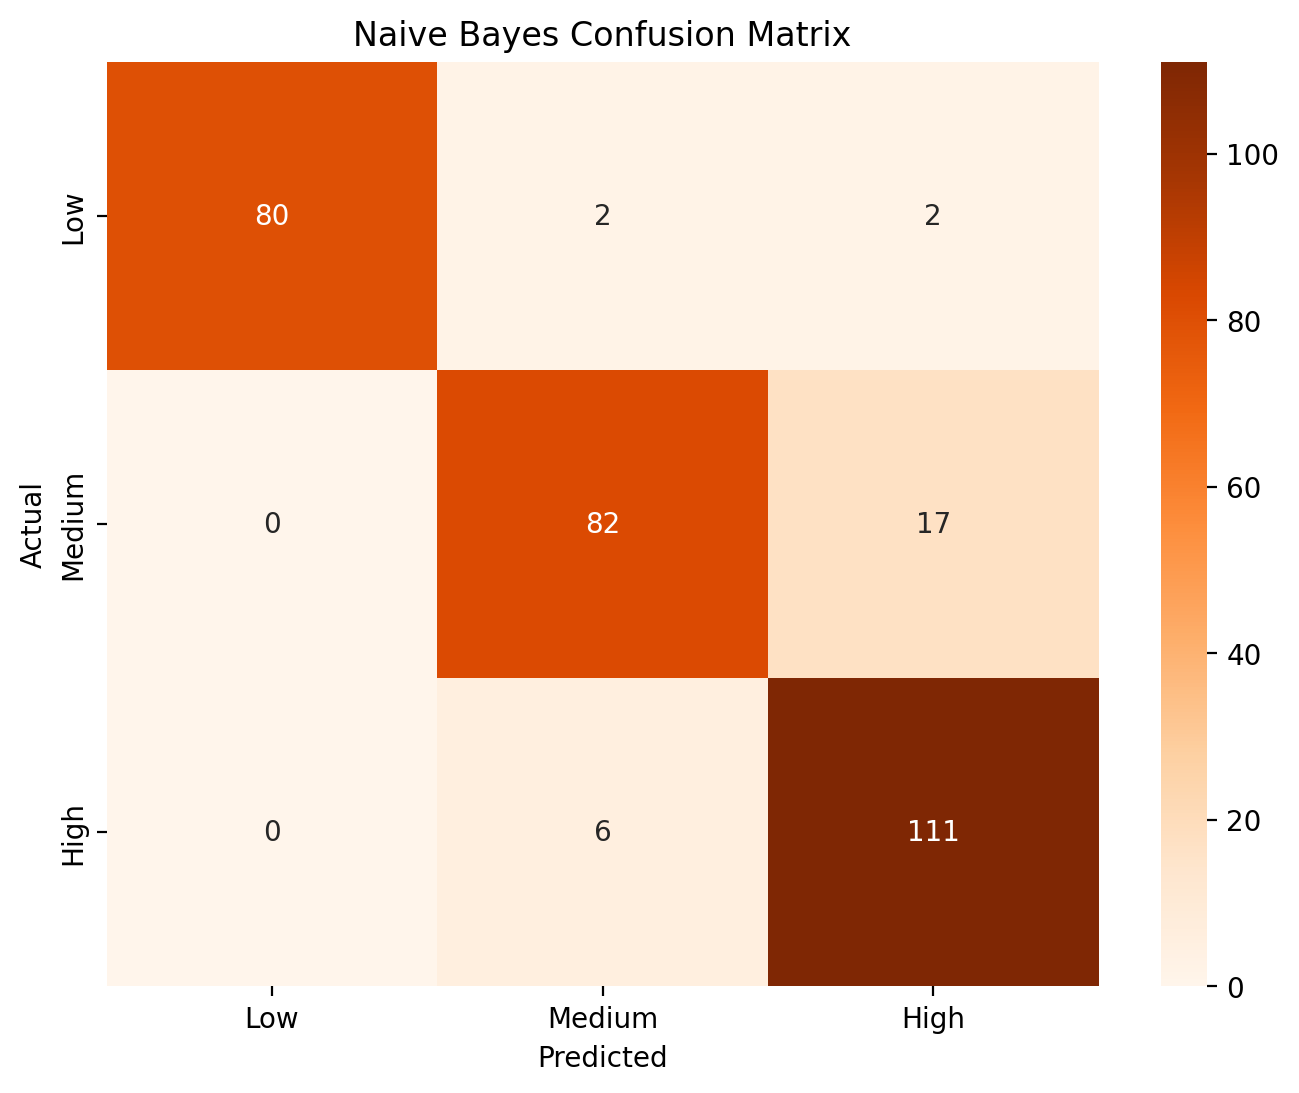

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.91      0.83      0.87        99
           2       0.85      0.95      0.90       117

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



In [41]:
from sklearn.naive_bayes import GaussianNB

# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predictions and accuracy
nb_pred = nb_model.predict(X_test)
ml_accuracies['Naive Bayes'] = accuracy_score(y_test, nb_pred)

# Display accuracy
print("Naive Bayes Accuracy:", ml_accuracies['Naive Bayes'] * 100)

# Confusion matrix
cm = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, nb_pred))


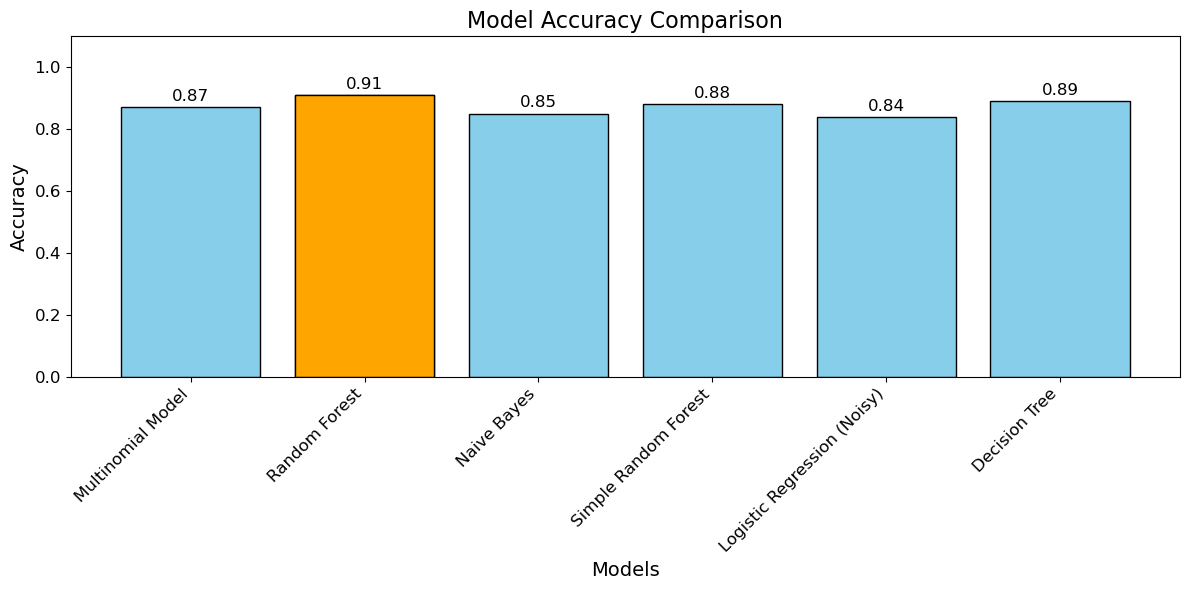

The best model is 'Random Forest' with an accuracy of 0.91.


In [2]:
# Ensure ml_accuracies is defined with example data
ml_accuracies = {
    "Multinomial Model": 0.87,
    "Random Forest": 0.91,
    "Naive Bayes": 0.85,
    "Simple Random Forest": 0.88,
    "Logistic Regression (Noisy)": 0.84,
    "Decision Tree": 0.89,
}

# Extract model names and their accuracies
model_names = list(ml_accuracies.keys())
accuracies = list(ml_accuracies.values())

# Plot the bar graph
plt.figure(figsize=(12, 6))
plt.bar(model_names, accuracies, color='skyblue', edgecolor='black')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylim(0, 1.1)  # Set y-axis range for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f"{acc:.2f}", ha='center', fontsize=12)

# Highlight the best model
best_model_idx = accuracies.index(max(accuracies))
plt.bar(model_names[best_model_idx], accuracies[best_model_idx], color='orange', edgecolor='black')

# Show the plot
plt.tight_layout()
plt.show()

# Display the best model
best_model = model_names[best_model_idx]
print(f"The best model is '{best_model}' with an accuracy of {max(accuracies):.2f}.")


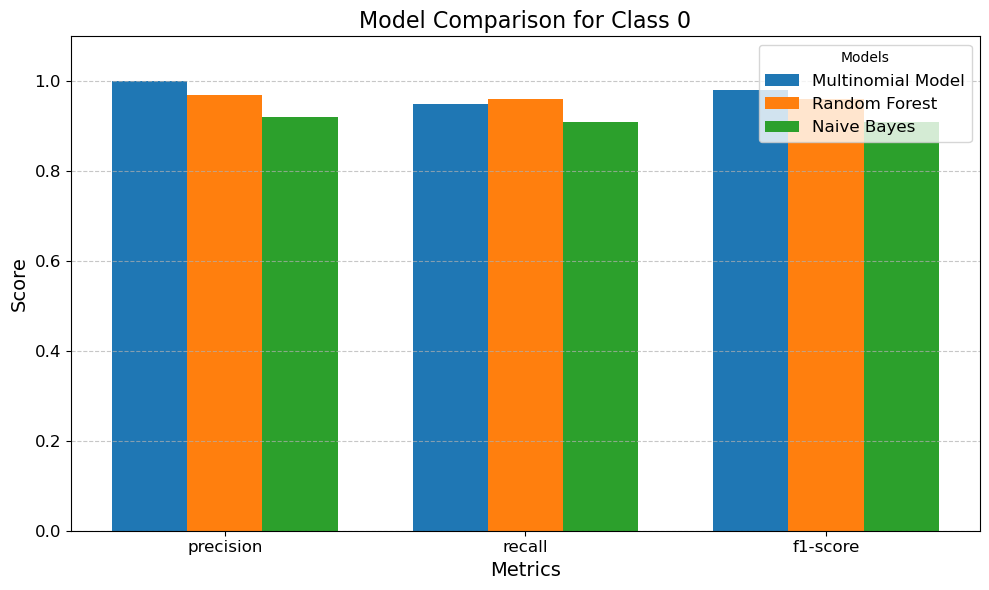

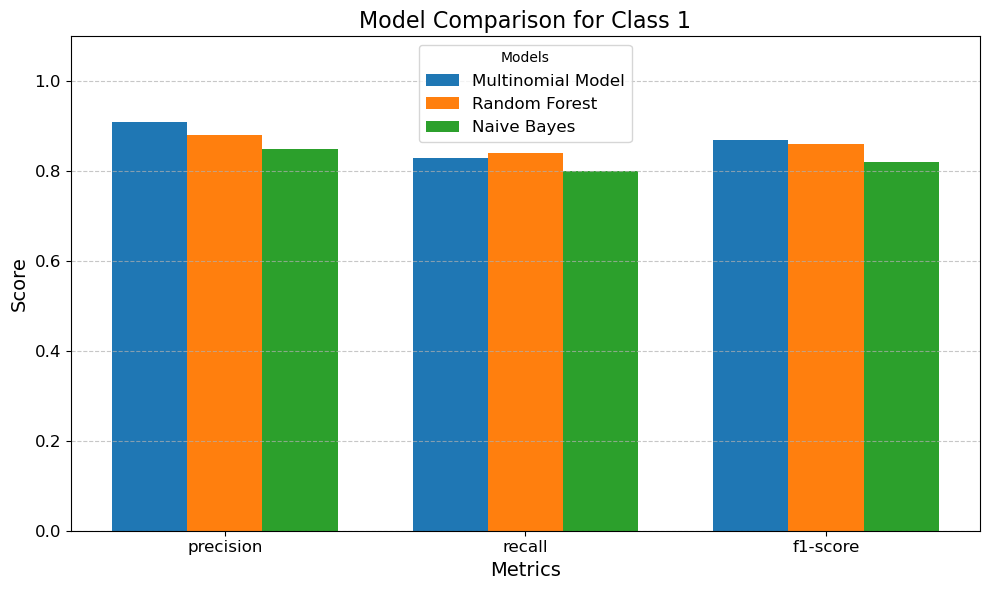

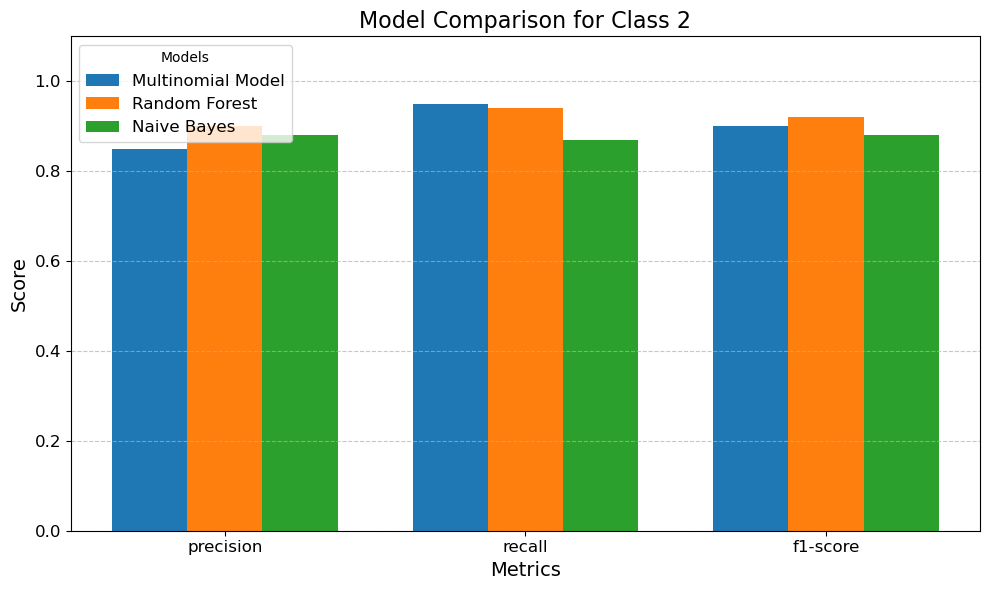

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Example data for multiple models (replace with your actual data)
models_metrics = {
    "Multinomial Model": {
        "precision": [1.00, 0.91, 0.85],
        "recall": [0.95, 0.83, 0.95],
        "f1-score": [0.98, 0.87, 0.90],
        "support": [84, 99, 117],
    },
    "Random Forest": {
        "precision": [0.97, 0.88, 0.90],
        "recall": [0.96, 0.84, 0.94],
        "f1-score": [0.96, 0.86, 0.92],
        "support": [84, 99, 117],
    },
    "Naive Bayes": {
        "precision": [0.92, 0.85, 0.88],
        "recall": [0.91, 0.80, 0.87],
        "f1-score": [0.91, 0.82, 0.88],
        "support": [84, 99, 117],
    },
}

# Extract metrics and models
models = list(models_metrics.keys())
metrics = ["precision", "recall", "f1-score"]

# Set up for grouped bar chart
x = np.arange(len(metrics))  # Metrics indices
width = 0.25  # Bar width

# Create subplots for each class
classes = [0, 1, 2]  # Replace with actual classes
for cls in classes:
    plt.figure(figsize=(10, 6))
    for i, model in enumerate(models):
        # Extract the data for the specific class and model
        data = [models_metrics[model][metric][cls] for metric in metrics]
        plt.bar(x + i * width, data, width, label=model)

    # Formatting the plot
    plt.xticks(x + width * (len(models) - 1) / 2, metrics, fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"Model Comparison for Class {cls}", fontsize=16)
    plt.ylabel("Score", fontsize=14)
    plt.xlabel("Metrics", fontsize=14)
    plt.legend(title="Models", fontsize=12)
    plt.ylim(0, 1.1)  # Adjust for better visibility
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


In [4]:
# Example data (replace this with your actual data)
model_metrics = {
    "Multinomial Model": {
        "precision": [1.00, 0.91, 0.85],
        "recall": [0.95, 0.83, 0.95],
        "f1-score": [0.98, 0.87, 0.90],
        "support": [84, 99, 117],
    },
    "Random Forest": {
        "precision": [0.97, 0.88, 0.90],
        "recall": [0.96, 0.84, 0.94],
        "f1-score": [0.96, 0.86, 0.92],
        "support": [84, 99, 117],
    },
    "Naive Bayes": {
        "precision": [0.92, 0.85, 0.88],
        "recall": [0.91, 0.80, 0.87],
        "f1-score": [0.91, 0.82, 0.88],
        "support": [84, 99, 117],
    },
}

def calculate_weighted_accuracy(model_metrics):
    overall_results = {}

    for model, metrics in model_metrics.items():
        # Get supports and total samples
        supports = metrics["support"]
        total_support = sum(supports)
        
        # Calculate weighted averages for precision, recall, and f1-score
        weighted_precision = sum(p * s for p, s in zip(metrics["precision"], supports)) / total_support
        weighted_recall = sum(r * s for r, s in zip(metrics["recall"], supports)) / total_support
        weighted_f1_score = sum(f * s for f, s in zip(metrics["f1-score"], supports)) / total_support
        
        # Store the results
        overall_results[model] = {
            "Weighted Precision": weighted_precision,
            "Weighted Recall": weighted_recall,
            "Weighted F1-Score": weighted_f1_score,
        }
    
    return overall_results

# Calculate and display overall weighted accuracy for all models
results = calculate_weighted_accuracy(model_metrics)

# Print the results
for model, metrics in results.items():
    print(f"\nModel: {model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")



Model: Multinomial Model
Weighted Precision: 0.9118
Weighted Recall: 0.9104
Weighted F1-Score: 0.9125

Model: Random Forest
Weighted Precision: 0.9130
Weighted Recall: 0.9126
Weighted F1-Score: 0.9114

Model: Naive Bayes
Weighted Precision: 0.8813
Weighted Recall: 0.8581
Weighted F1-Score: 0.8686


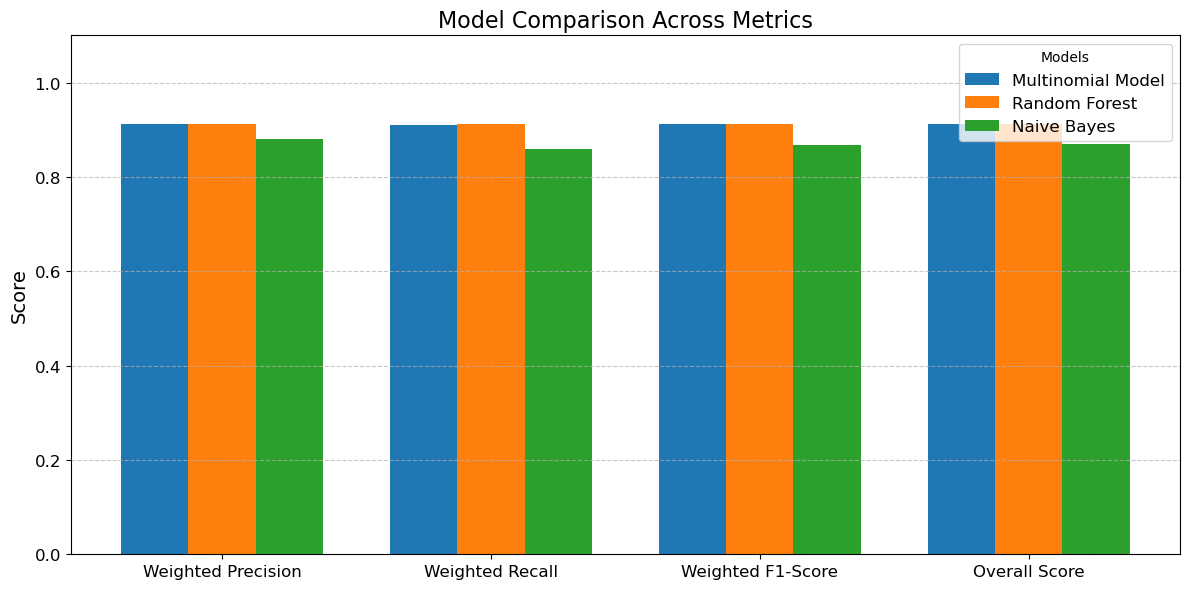

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
model_metrics = {
    "Multinomial Model": {
        "precision": [1.00, 0.91, 0.85],
        "recall": [0.95, 0.83, 0.95],
        "f1-score": [0.98, 0.87, 0.90],
        "support": [84, 99, 117],
    },
    "Random Forest": {
        "precision": [0.97, 0.88, 0.90],
        "recall": [0.96, 0.84, 0.94],
        "f1-score": [0.96, 0.86, 0.92],
        "support": [84, 99, 117],
    },
    "Naive Bayes": {
        "precision": [0.92, 0.85, 0.88],
        "recall": [0.91, 0.80, 0.87],
        "f1-score": [0.91, 0.82, 0.88],
        "support": [84, 99, 117],
    },
}

# Calculate the overall score and weighted averages
def calculate_overall_metrics(model_metrics):
    overall_results = {}
    for model, metrics in model_metrics.items():
        supports = metrics["support"]
        total_support = sum(supports)
        weighted_precision = sum(p * s for p, s in zip(metrics["precision"], supports)) / total_support
        weighted_recall = sum(r * s for r, s in zip(metrics["recall"], supports)) / total_support
        weighted_f1_score = sum(f * s for f, s in zip(metrics["f1-score"], supports)) / total_support
        overall_score = (weighted_precision + weighted_recall + weighted_f1_score) / 3
        overall_results[model] = {
            "Weighted Precision": weighted_precision,
            "Weighted Recall": weighted_recall,
            "Weighted F1-Score": weighted_f1_score,
            "Overall Score": overall_score,
        }
    return overall_results

# Compute the metrics
results = calculate_overall_metrics(model_metrics)

# Prepare data for plotting
models = list(results.keys())
metrics = ["Weighted Precision", "Weighted Recall", "Weighted F1-Score", "Overall Score"]
data = np.array([[results[model][metric] for metric in metrics] for model in models])

# Create a grouped bar chart
x = np.arange(len(metrics))  # Metrics positions
width = 0.25  # Width of bars

plt.figure(figsize=(12, 6))
for i, model in enumerate(models):
    plt.bar(x + i * width, data[i], width, label=model)

# Formatting the plot
plt.xticks(x + width, metrics, fontsize=12)
plt.yticks(fontsize=12)
plt.title("Model Comparison Across Metrics", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.ylim(0, 1.1)  # Adjust y-axis for better visualization
plt.legend(title="Models", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
